# 여행 데이터 분석 및 마케팅 추천

## 주제
- 여행 데이터를 분석해서 언제 마케팅을 많이 하고 어디로 가면 좋을지를 추천한다.
- 1. 월별 각 지역 방문율 확인 -> 계절성 확인 -> 특정 지역에서 특정 시기에 다른 곳 보다 방문율이 높은 경우 해당 시기에 더욱 마케팅을 많이 할 것을 추천
- 2. 비슷한 카테고리(놀이공원, 유적지 등)에 포함된 관광지들의 방문율을 확인하고 방문율이 낮은 곳에 마케팅을 더 열심히 할 것을 추천, 상인들은 방문율이 높은 곳을 추천

### 필요 데이터
- 각 지역 관광지 정보
- month에 따른 관광지 방문객수
- month에 따른 관광객 지출 비용

### 데이터 플랫폼, 얻을 수 있는 정보
- 문화빅데이터플랫폼 data: 
    - 관광지 정보(한국관광데이터랩의 주요 관광지 데이터로 대체)
    - 관광지 년도 및 월별 검색량(추후 병합을 통해 하나의 데이터 프레임으로 만들어준다.)
- 관광지식정보시스템 data(X)
- 한국관광 데이터랩 data: 
    - 지역별 분석->전국현황
        - 전국 2019~2023년에 각 월별 방문객수(크롤링 구현)
    - 빅데이터->지역별 방문자수 분석
        - 전국 각 지역 방문자수(kt)
    - 지역별 분석->지역별 관광 현황->방문자(크롤링 일부 구현)
        - 각 지역 목적지 유형별 검색량
        - 방문자 거주지 분포
        - 방문자 성/연령 분포
        - 현지인/외지인 관심지점 비교 (x)
        - 각 지역 주요 인기관광지 입장객 수 데이터 (x)
    - 지역별 분석->지역별 관광 현황->인기관광지 : 관광지의 물리적 데이터를 제공
        - 주요 유료관광지점 입장객 수 -> 검색량 변화와 함께 사용하면 검색량이 실제 방문자수로 이어지는지 확인 가능
        - 인기 관광지->관광지의 물리적 데이터
        - 중심 관광지->관광지의 물리적 데이터
        
### 확인하고 싶은 부분
- 강원도의 경우 겨울에 방문자수 현황이 다른 지역과 다른 형태를 띌까?
    - 내 지식으로는 스키장이 있으므로 겨울에 증가하거나 여름과 비슷할 것 같다.
    - 특히 양양이 궁금 -> 서프비치가 방문자수에 영향을 줬을까? 겨울에는 방문자가 얼마나 줄어들까?
- 주로 겨울에 방문자수가 줄어든다. -> 이와 상반되는 결과를 가지는 지역이 있을까?
- 계절에 상관없이 항상 일정한 방문자를 가지는 지역이 있을까? -> 방문자수의 절대적인 수는 상관X

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False  

## 문화빅데이터 플랫폼 데이터 읽어오기

### 관광지 정보 데이터
- 단순히 관광지의 물리적 데이터를 제공함

In [2]:
# 관광지 정보 -> 정말 단순히 관광지의 물리적 정보를 제공 -> 해당 데이터보다 한국관광 데이터랩이 더 괜찮을 것 같다.

spot_df = pd.read_csv('./data/문화빅데이터플랫폼/KC_495_LLR_ATRCTN_2023.csv')
spot_df

,ID,LCLAS_NM,MLSFC_NM,POI_ID,POI_NM,BHF_NM,ASSTN_NM,CL_CD,CL_NM,PNU,...,RDNMADR_CD,RDNMADR_NM,BULD_NO,LC_LO,LC_LA,GID_CD,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KCLANPO23N000000001,장소,관광지,76838,간절곶등대,NaN,NaN,60513,일반관광지,3171031025100280001,...,3.171043e+11,간절곶1길,39-2,129.360675,35.359029,마마690086,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
1,KCLANPO23N000000002,장소,관광지,141502,우성항공여행사,NaN,NaN,60403,항공사/여행사,4579025021102250000,...,4.579033e+11,중앙로,232,126.700823,35.434790,다마274157,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
2,KCLANPO23N000000003,장소,관광지,142394,우정여행사,NaN,NaN,60403,항공사/여행사,1114010300100310023,...,1.114041e+11,세종대로20길,15,126.978339,37.567237,다사539521,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
3,KCLANPO23N000000004,장소,관광지,145432,비산항공여행사,NaN,NaN,60403,항공사/여행사,1165010700100520006,...,1.165031e+11,서초중앙로,225,127.011566,37.501664,다사568448,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
4,KCLANPO23N000000005,장소,관광지,149376,부래여행사,NaN,NaN,60403,항공사/여행사,2611010700100550001,...,2.611031e+11,해관로,76,129.035622,35.105620,마라399800,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51475,KCLANPO23N000051476,장소,관광지,23412510,삼척맹방해변길,NaN,NaN,60513,일반관광지,5123031022102210009,...,NaN,NaN,NaN,129.230584,37.391000,마사531338,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51476,KCLANPO23N000051477,장소,관광지,23412511,영덕블루로드,NaN,NaN,60513,일반관광지,4777031031105810000,...,NaN,NaN,NaN,129.391512,36.358874,마바697196,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51477,KCLANPO23N000051478,장소,관광지,23412512,관악별빛산책,NaN,NaN,60523,지역축제,1162010200116420007,...,NaN,NaN,NaN,126.926914,37.483544,다사493428,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220
51478,KCLANPO23N000051479,장소,관광지,23412513,서면빛축제,NaN,NaN,60523,지역축제,2623010300105760001,...,2.623042e+11,신천대로78번길,51,129.057691,35.154344,마라418854,20240108,KT,KC_495_LLR_ATRCTN_2023,20231220


In [3]:
# 필요시 col명을 한글로 대체
spot_col_list = ['ID', '대분류명', '중분류명', 
            'POI_ID', 'POI명', '지점명', 
            '보조명', '분류코드', '분류명', 
            '지번고유코드', '시도명', '시군구명', 
            '법정동명', '리명', '번지번호', 
            '법정동코드', '행정동코드', '도로명주소코드', 
            '도로명주소명', '건물번호', '위치경도',
            '위치위도', '격자코드', '최종변경일자',
            '출처명', '파일명', '기준일자']

In [4]:
# spot_df.columns = spot_col_list

In [5]:
spot_df.columns

Index(['ID', 'LCLAS_NM', 'MLSFC_NM', 'POI_ID', 'POI_NM', 'BHF_NM', 'ASSTN_NM',
       'CL_CD', 'CL_NM', 'PNU', 'CTPRVN_NM', 'SIGNGU_NM', 'LEGALDONG_NM',
       'LI_NM', 'LNBR_NO', 'LEGALDONG_CD', 'ADSTRD_CD', 'RDNMADR_CD',
       'RDNMADR_NM', 'BULD_NO', 'LC_LO', 'LC_LA', 'GID_CD', 'LAST_CHG_DE',
       'ORIGIN_NM', 'FILE_NM', 'BASE_DE'],
      dtype='object')

In [6]:
spot_df.shape

(51480, 27)

In [4]:
# 결측치 확인
spot_df.isna().sum()

ID                  0
LCLAS_NM            0
MLSFC_NM            0
POI_ID              0
POI_NM              0
BHF_NM          49701
ASSTN_NM        51480
CL_CD               0
CL_NM               0
PNU                 0
CTPRVN_NM           0
SIGNGU_NM         161
LEGALDONG_NM        0
LI_NM           30459
LNBR_NO           598
LEGALDONG_CD        0
ADSTRD_CD           0
RDNMADR_CD      10358
RDNMADR_NM      10357
BULD_NO         10357
LC_LO               0
LC_LA               0
GID_CD              0
LAST_CHG_DE         0
ORIGIN_NM           0
FILE_NM             0
BASE_DE             0
dtype: int64

<Axes: >

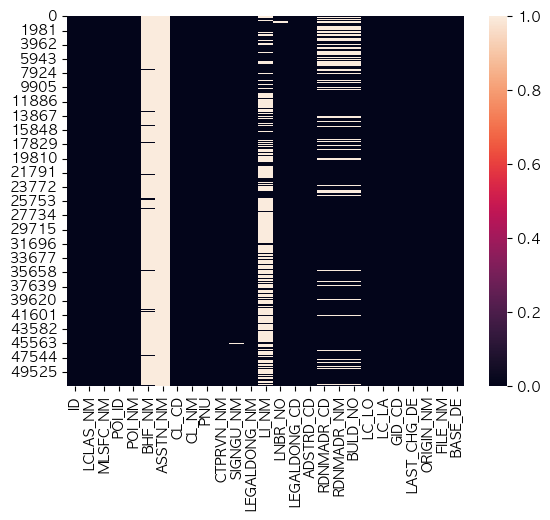

In [8]:
# 결측치를 시각화 -> heatmap -> 흰색은 결측치 -> 흰색이 많으면 결측치가 많다는 것 -> 해당 변수는 삭제
# 결측치가 상당히 많다는 것을 알 수 있다.

sns.heatmap(spot_df.isna())

### 검색량 데이터
- 각 관광지가 언제 얼마나 검색되었는지 알 수 있다.
- 특정 관광지가 어떤 시즌에 인기가 있는지 알 수 있다.
- 서로 다른 관광지를 비교하여 특정 시기에 상대적으로 인기가 많은 관광지를 알 수 있다.
- but 실제로 방문한 정보는 모르기에 추가 데이터가 필요하다.
- 아래에서 월별 지역 방문객수와 함께 사용할 경우 정확도를 보장할 수 있을 것 같다.
- 현재 가져온 데이터 구간 : 202006 ~ 202309

In [5]:
# 데이터의 파일 이름이 길어서 사용하기 어려우므로 파일 이름을 변경해준다.
# 1. 모든 파일을 가져온다.
# 2. 파일의 이름을 '년도월'형태로 변경

import os

path = './data/문화빅데이터플랫폼/월별 검색량/'
file_list = os.listdir(path)

In [6]:
len(file_list) # 전체 파일 갯수 확인

41

In [7]:
file_list[4] # 숨겨진 폴더의 위치 확인

'202309.csv'

In [8]:
# YYYYMM형태로 데이터 이름 변경
'''
for i in range(len(file_list)):
    if i != 4:
        os.rename(path+file_list[i], path+file_list[i][27:])
'''

'\nfor i in range(len(file_list)):\n    if i != 4:\n        os.rename(path+file_list[i], path+file_list[i][27:])\n'

In [9]:
file_list = os.listdir(path)
file_list.sort() # 년도를 기준으로 오름차순 정렬 -> 나중에 dataframe 생성 후 년도를 기준으로 정렬해도 될 것 같다.
file_list

['.DS_Store',
 '202006.csv',
 '202007.csv',
 '202008.csv',
 '202009.csv',
 '202010.csv',
 '202011.csv',
 '202012.csv',
 '202101.csv',
 '202102.csv',
 '202103.csv',
 '202104.csv',
 '202105.csv',
 '202106.csv',
 '202107.csv',
 '202108.csv',
 '202109.csv',
 '202110.csv',
 '202111.csv',
 '202112.csv',
 '202201.csv',
 '202202.csv',
 '202203.csv',
 '202204.csv',
 '202205.csv',
 '202206.csv',
 '202207.csv',
 '202208.csv',
 '202209.csv',
 '202210.csv',
 '202211.csv',
 '202212.csv',
 '202301.csv',
 '202302.csv',
 '202303.csv',
 '202304.csv',
 '202305.csv',
 '202306.csv',
 '202307.csv',
 '202308.csv',
 '202309.csv']

In [10]:
# 모든 csv파일을 읽어와서 리스트에 저장한다.
search_df_li = list()

for file in file_list[1:]:
    tmp = pd.read_csv(path+file)
    search_df_li.append(tmp)

In [11]:
# 모든 데이터의 columns가 모두 동일한지 확인
# 모두 동일하므로 병합할 때 처리가 불필요

for search_df in search_df_li:
    print(search_df.columns.to_list())

['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']
['SEQ_NO', 'SCCNT_YM', 'ORIGIN_ID', 'REPRSNT_KWRD_NM', 'SRCHWRD_NM', 'SCCNT_VALUE', 'ORIGIN_CL_NM']


In [12]:
# 랜덤하게 데이터를 뽑아서 결측치가 있는지 확인
# 결측치는 없는 것으로 확인

search_df_li[16].isna().sum()

SEQ_NO             0
SCCNT_YM           0
ORIGIN_ID          0
REPRSNT_KWRD_NM    0
SRCHWRD_NM         0
SCCNT_VALUE        0
ORIGIN_CL_NM       0
dtype: int64

In [13]:
pd.concat([df for df in search_df_li], axis=1)

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM,SEQ_NO,SCCNT_YM,ORIGIN_ID,...,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM
0,148305,2020-06,SAN_0007,가산,가산,10670,관광명소,193367.0,2020-07,SAN_0002,...,기상대기념공원,30.0,관광명소,444508.0,2023-09,SAN_0146,다락산,다락산,11.0,관광명소
1,148311,2020-06,CULTURE_001471,강릉,강릉,184900,관광명소,194062.0,2020-07,SAN_0039,...,구만동계곡,570.0,관광명소,445127.0,2023-09,SAN_0218,만수산,만수산,2020.0,관광명소
2,148317,2020-06,CULTURE_001495,건릉,건릉,900,관광명소,194204.0,2020-07,SAN_0043,...,구만산,3150.0,관광명소,446453.0,2023-09,SAN_0439,성치산,성치산,400.0,관광명소
3,148323,2020-06,SAN_0039,검산,검산,1530,관광명소,195168.0,2020-07,SAN_0092,...,구만폭포,1400.0,관광명소,445408.0,2023-09,SAN_0263,미륵산,미륵산,4880.0,관광명소
4,148324,2020-06,SAN_0040,검산,검산,1530,관광명소,207748.0,2020-07,SAN_0620,...,구목정공원,100.0,관광명소,445827.0,2023-09,SAN_0354,부용산,부용산,1230.0,관광명소
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,193280,2020-06,KC495PP19N018948,원수산MTB공원,원수산MTB공원,160,관광명소,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8038,193286,2020-06,KC498PP19N001377,한국SGI평화공원,한국SGI평화공원,350,관광명소,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8039,193292,2020-06,KC498PP19N006695,UN기념공원,UN기념공원,1910,관광명소,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8040,193298,2020-06,KC498PP19N006733,UN조각공원,UN조각공원,70,관광명소,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 데이터 병합

search_df = pd.concat([df for df in search_df_li]).reset_index(drop=True) # 인덱스는 새롭게 생성 -> False인 경우 데이터의 수와 인덱스가 일치하지 않는다.
search_df

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM
0,148305,2020-06,SAN_0007,가산,가산,10670,관광명소
1,148311,2020-06,CULTURE_001471,강릉,강릉,184900,관광명소
2,148317,2020-06,CULTURE_001495,건릉,건릉,900,관광명소
3,148323,2020-06,SAN_0039,검산,검산,1530,관광명소
4,148324,2020-06,SAN_0040,검산,검산,1530,관광명소
...,...,...,...,...,...,...,...
240272,447756,2023-09,KC498PP19N001320,윗소사공원,윗소사공원,15,관광명소
240273,447757,2023-09,KC498PP19N001498,윗잔다리어린이공원,윗잔다리어린이공원,40,관광명소
240274,447758,2023-09,KC495PP19N014560,유기농테마파크,유기농테마파크,18,관광명소
240275,447759,2023-09,KC498PP19N003439,유니온파크,유니온파크,1040,관광명소


In [13]:
# 병합한 데이터의 형태 확인

search_df.shape

(240277, 7)

In [14]:
# 병합한 데이터의 결측치 확인 -> 결측치는 없다.

search_df.isna().sum()

SEQ_NO             0
SCCNT_YM           0
ORIGIN_ID          0
REPRSNT_KWRD_NM    0
SRCHWRD_NM         0
SCCNT_VALUE        0
ORIGIN_CL_NM       0
dtype: int64

In [15]:
# 수치형 변수의 통계적 값 확인
search_df.describe()

,SEQ_NO,SCCNT_VALUE
count,240277.000000,2.402770e+05
mean,310723.795394,2.419281e+03
std,76581.804756,2.378850e+04
min,148305.000000,2.000000e+00
25%,245332.000000,3.100000e+01
50%,305401.000000,1.100000e+02
75%,377176.000000,6.200000e+02
max,449420.000000,3.783900e+06


In [21]:
# 데이터 타입 확인

search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240277 entries, 0 to 240276
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SEQ_NO           240277 non-null  int64 
 1   SCCNT_YM         240277 non-null  object
 2   ORIGIN_ID        240277 non-null  object
 3   REPRSNT_KWRD_NM  240277 non-null  object
 4   SRCHWRD_NM       240277 non-null  object
 5   SCCNT_VALUE      240277 non-null  int64 
 6   ORIGIN_CL_NM     240277 non-null  object
dtypes: int64(2), object(5)
memory usage: 12.8+ MB


In [22]:
# SCCNT_YM값을 datetime형태로 변환

search_df['SCCNT_YM'] = pd.to_datetime(search_df['SCCNT_YM'])
search_df['SCCNT_YM']

0        2020-06-01
1        2020-06-01
2        2020-06-01
3        2020-06-01
4        2020-06-01
            ...    
240272   2023-09-01
240273   2023-09-01
240274   2023-09-01
240275   2023-09-01
240276   2023-09-01
Name: SCCNT_YM, Length: 240277, dtype: datetime64[ns]

In [18]:
type(search_df['SRCHWRD_NM'])

pandas.core.series.Series

In [19]:
search_df['SRCHWRD_NM']

0                가산
1                강릉
2                건릉
3                검산
4                검산
            ...    
240272        윗소사공원
240273    윗잔다리어린이공원
240274      유기농테마파크
240275        유니온파크
240276      유달산조각공원
Name: SRCHWRD_NM, Length: 240277, dtype: object

In [16]:
search_df['SRCHWRD_NM'].unique().tolist()

['가산',
 '강릉',
 '건릉',
 '검산',
 '경릉',
 '공원',
 '관산',
 '광릉',
 '금모',
 '금봉',
 '금산',
 '남산',
 '냉산',
 '늘품',
 '능금',
 '단산',
 '돌산',
 '동산',
 '루지',
 '마산',
 '망산',
 '면산',
 '명릉',
 '목릉',
 '발산',
 '변산',
 '비산',
 '사릉',
 '삼산',
 '서산',
 '선릉',
 '설산',
 '성터',
 '솔빛',
 '수릉',
 '숭릉',
 '안산',
 '앞산',
 '앵산',
 '억산',
 '영릉',
 '예릉',
 '옥산',
 '올산',
 '왕산',
 '용산',
 '웅산',
 '원릉',
 '유릉',
 '융릉',
 '익릉',
 '장릉',
 '장산',
 '접산',
 '정릉',
 '조봉',
 '종묘',
 '주산',
 '중봉',
 '창릉',
 '큰산',
 '큰엉',
 '풀빛',
 '현릉',
 '혜릉',
 '홍릉',
 '환산',
 '효릉',
 '후릉',
 '휘릉',
 '희릉',
 '가덕산',
 '가라산',
 '가령산',
 '가리산',
 '가마골',
 '가마섬',
 '가섭산',
 '가야산',
 '가은산',
 '가지산',
 '각호산',
 '각화산',
 '각흘산',
 '각희산',
 '간월산',
 '갈기산',
 '갈라산',
 '갈현성',
 '감악산',
 '감암산',
 '갑장산',
 '강천산',
 '개인산',
 '거류산',
 '거망산',
 '거문산',
 '거열산',
 '건원릉',
 '검단산',
 '검룡소',
 '검마산',
 '검봉산',
 '것대산',
 '경각산',
 '경복궁',
 '경희궁',
 '계관산',
 '계룡산',
 '계명산',
 '계방산',
 '계족산',
 '고대산',
 '고덕산',
 '고동산',
 '고래산',
 '고려성',
 '고령산',
 '고양산',
 '고헌산',
 '공덕산',
 '공산성',
 '공작산',
 '관룡산',
 '관문성',
 '관악산',
 '관음산',
 '광교산',
 '광대곡',
 '광덕산',
 '광려산',
 '광양숲',
 '괘관산',
 '구곡산',

In [24]:
# 특정 검색어의 월별 검색 횟수 시각화 -> 임의로 뽑았음
# 팔공산 검색 횟수

tmp = search_df[search_df['SRCHWRD_NM']=='팔공산']
tmp.head()

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM
866,153460,2020-06-01,SAN_0722,팔공산,팔공산,24890,관광명소
13631,209850,2020-07-01,SAN_0722,팔공산,팔공산,25420,관광명소
19669,209851,2020-08-01,SAN_0722,팔공산,팔공산,27490,관광명소
25720,209852,2020-09-01,SAN_0722,팔공산,팔공산,25550,관광명소
31880,227177,2020-10-01,SAN_0722,팔공산,팔공산,43060,관광명소


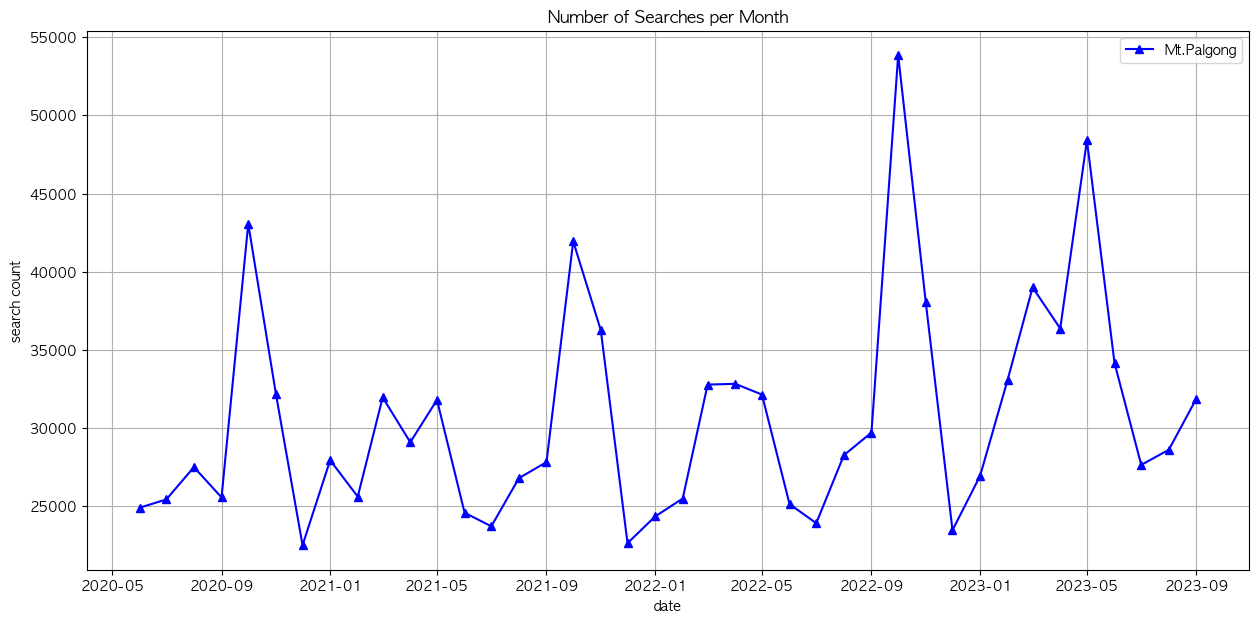

In [25]:
# 그래프로 시각화 -> 하나의 검색어가 늘어날 때 다른 값 역시 늘어나는지 확인할 수 있다.
# 단순히 검색량을 기준으로 하기에 상대적으로 데이터의 검색량이 작으면 그래프의 변화폭이 작아보인다. -> 정규화 필요

plt.figure(figsize=(15, 7))
plt.plot(tmp['SCCNT_YM'], tmp['SCCNT_VALUE'], marker='^', linestyle='-', color='b', label='Mt.Palgong') # 팔공산 그래프
plt.title('Number of Searches per Month')
plt.grid(True)
plt.xlabel('date')
plt.ylabel('search count')
plt.legend()
plt.show()

In [26]:
# 남한산성 데이터

tmp2 = search_df[search_df['SRCHWRD_NM']=='남한산성']
tmp2.head()

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM
1648,158058,2020-06-01,CULTURE_001509,남한산성,남한산성,239900,관광명소
9006,196138,2020-07-01,CULTURE_001509,남한산성,남한산성,108400,관광명소
15145,196139,2020-08-01,CULTURE_001509,남한산성,남한산성,89900,관광명소
21192,196140,2020-09-01,CULTURE_001509,남한산성,남한산성,110500,관광명소
27255,214237,2020-10-01,CULTURE_001509,남한산성,남한산성,146500,관광명소


In [27]:
# 에버랜드 데이터

tmp3 = search_df[search_df['SRCHWRD_NM']=='에버랜드']
tmp3.head()

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM
2889,164978,2020-06-01,KC495PP19N026010,에버랜드,에버랜드,436600,관광명소
11834,204539,2020-07-01,KC495PP19N026010,에버랜드,에버랜드,532500,관광명소
17930,204540,2020-08-01,KC495PP19N026010,에버랜드,에버랜드,479600,관광명소
23974,204541,2020-09-01,KC495PP19N026010,에버랜드,에버랜드,593200,관광명소
30084,222163,2020-10-01,KC495PP19N026010,에버랜드,에버랜드,1192400,관광명소


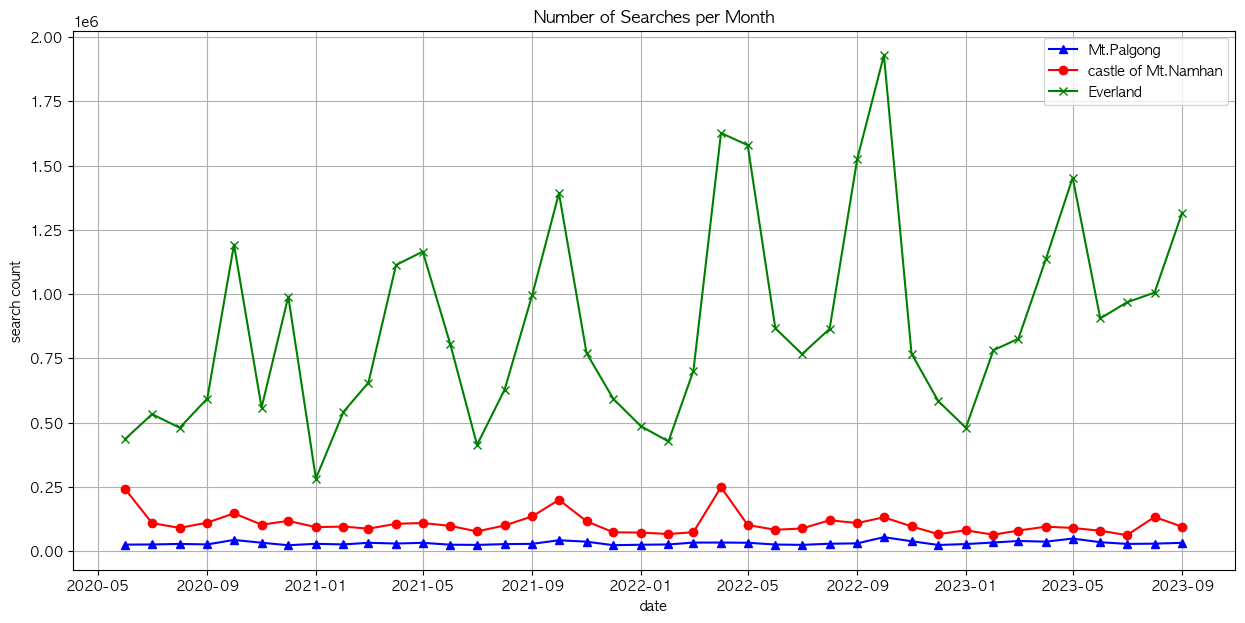

In [28]:
# 그래프로 시각화 -> 하나의 검색어가 늘어날 때 다른 값 역시 늘어나는지 확인할 수 있다.
# 단순히 검색량을 기준으로 하기에 상대적으로 데이터의 검색량이 작으면 그래프의 변화폭이 작아보인다. -> 정규화 필요

# 남한산성과 팔공산은 산이라는 공통된 테마를 가지는 반면 에버랜드는 놀이동산이라는 완전 다른 특성을 지닌다.
# 하지만 실외라는 특성을 공유한다. -> 관광지의 각 특성이 어느정도 영향을 주는지 알 수 있지 않을까?

# 대략적인 형태가 비슷하다. -> 실외라는 특성이 만들어낸 결과?
# 에버랜드의 경우 검색량이 압도적으로 많다. -> 남녀노소 누구나  좋아하는 놀이동산이라는 특성이 만들어낸 결과가 아닐까?

plt.figure(figsize=(15, 7))
plt.plot(tmp['SCCNT_YM'], tmp['SCCNT_VALUE'], marker='^', linestyle='-', color='b', label='Mt.Palgong') # 팔공산 그래프
plt.plot(tmp2['SCCNT_YM'], tmp2['SCCNT_VALUE'], marker='o', linestyle='-', color='r', label='castle of Mt.Namhan') # 남한산성 그래프
plt.plot(tmp3['SCCNT_YM'], tmp3['SCCNT_VALUE'], marker='x', linestyle='-', color='g', label='Everland') # 에버랜드
plt.title('Number of Searches per Month')
plt.grid(True)
plt.xlabel('date')
plt.ylabel('search count')
plt.legend()
plt.show()

In [29]:
# 롯데월드

tmp4 = search_df[search_df['SRCHWRD_NM']=='롯데월드']
tmp4.head()

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM
1930,159622,2020-06-01,KC495PP19N026003,롯데월드,롯데월드,728200,관광명소
9714,198238,2020-07-01,KC495PP19N026003,롯데월드,롯데월드,337900,관광명소
15847,198239,2020-08-01,KC495PP19N026003,롯데월드,롯데월드,486600,관광명소
21879,198240,2020-09-01,KC495PP19N026003,롯데월드,롯데월드,237900,관광명소
27972,216224,2020-10-01,KC495PP19N026003,롯데월드,롯데월드,578600,관광명소


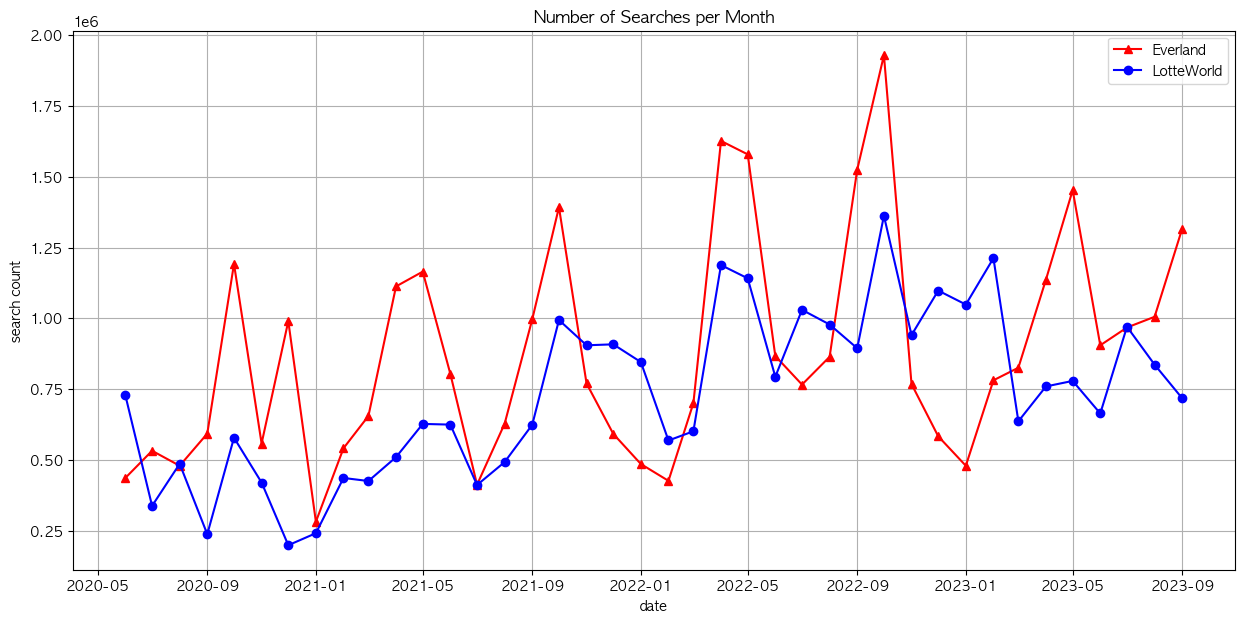

In [30]:
# 그래프로 시각화 -> 하나의 검색어가 늘어날 때 다른 값 역시 늘어나는지 확인할 수 있다.

# 에버랜드와 롯데월드의 비교
# 에버랜드와 롯데월드의 물리적 검색량 비교로 어디가 더 인기가 있는지 대략적으로 알 수 있다. -> 최근 데이터에서는 푸바오의 인기로 더 심해졌을 수 있다.
# 롯데월드는 실내인데 겨울에 검색량이 줄어들까?
# 에버랜드는 보통 할로윈이 끝나고 조금 지나면 검색률이 줄어든다. 반면 롯데월드는 1월이 조금 넘어서 줄어들기 시작한다.

# 롯데월드는 겨울에 더 마케팅을 하는게 좋을 것이라는 추천 결과를 도출 할 수 있을 것 같다.

# 에버랜드는 봄과 가을에 검색량이 늘어난다. -> 날씨에 영향을 많이 받는다. + 방학기간, 수학여행 기간에 영향을 받는다.

# 거의 같은 위치에 있지만 관광지의 특성으로 서로다른 결과를 나타내는 경우가 있을까?
# 여름에 캐리비안베이와 에버랜드의 결과 비교 -> 데이터가 없어서 사실상 할 수 없음
# 캐리비안베이는 여름에 손님이 압도적으로 많은 반면 에버랜드는 여름에 손님이 적어진다.
# 이러한 점을 이용해서 에버랜드는 여름, 겨울에 캐리비안 베이 이용시 에버랜드 이용권을 주는 '투파크' 마케팅을 실시함
# 이것과 비슷한 케이스가 있을까? ex) 강원도의 스키장과 하늘목장?

plt.figure(figsize=(15, 7))
plt.plot(tmp3['SCCNT_YM'], tmp3['SCCNT_VALUE'], marker='^', linestyle='-', color='r', label='Everland') # 에버랜드
plt.plot(tmp4['SCCNT_YM'], tmp4['SCCNT_VALUE'], marker='o', linestyle='-', color='b', label='LotteWorld') # 롯데월드
plt.title('Number of Searches per Month')
plt.grid(True)
plt.xlabel('date')
plt.ylabel('search count')
plt.legend()
plt.show()

In [31]:
# 캐리비안베이 데이터가 있는지 검색
# 없는 것 같다...

tmp5 = search_df[search_df['SRCHWRD_NM']=='캐리비안베이(워터파크)']
tmp5

,SEQ_NO,SCCNT_YM,ORIGIN_ID,REPRSNT_KWRD_NM,SRCHWRD_NM,SCCNT_VALUE,ORIGIN_CL_NM


### 지역별 관광지 정보와 월별 검색 데이터 같이 이용

In [32]:
spot_list = spot_df['POI_NM'].unique().tolist()
len(spot_list)

40440

In [33]:
len(search_df['SRCHWRD_NM'].unique().tolist())

7766

In [34]:
# 두 데이터에서 겹치는 관광지를 뽑아낸다.
# 두 데이터에 모두 있는 관광지의 경우 특정 관광지를 선택했을 때 어떤 특성을 보이는지 시각화 및 다른 관광지와 차별화 마케팅을 위해 강점으로 가져가야될 부분을 찾을 수 있을 것이다.

re = []
cnt = 0

for i in range(len(search_df['SRCHWRD_NM'].unique().tolist())):
    if search_df['SRCHWRD_NM'].unique().tolist()[i] in spot_list:
        cnt += 1
        re.append(i)

print(re)

KeyboardInterrupt: 

In [38]:
# 두 데이터에서 겹치는 관광지 갯수 확인

print(len(re))
print(cnt)

1139
1139


## 한국관광 데이터랩 플랫폼 데이터 읽어오기
- 크롤링 구현중
- 월별 전국 방문객 수 현황
- 월별 서울, 부산, 대구 방문객 수 현황
- 앞서 확인한 관광지 검색 횟수와 결합하여 검색률이 방문객 데이터로 이어지는지 알 수 있을 것 같다.(아직 구현은 안 함)

### 전국 기준 데이터

In [39]:
path = './data/한국관광 데이터랩/방문자수추이'

In [40]:
whole_df_data_dir_list = os.listdir(path+'/전국')

In [41]:
print(whole_df_data_dir_list)

['.DS_Store', '20240430172953_지역 방문자수_관광지출액 추세.csv', '20240430173000_지역 방문자수_관광지출액 추세.csv', '20240430173006_지역 방문자수_관광지출액 추세.csv', '20240430173012_지역 방문자수_관광지출액 추세.csv', '20240430173019_지역 방문자수_관광지출액 추세.csv']


In [42]:
whole_df_list = list()

for df_dir in whole_df_data_dir_list[1:]:
    whole_df_list.append(pd.read_csv(path+'/전국/'+df_dir, encoding='cp949'))

In [43]:
for df in whole_df_list:
    print(df.head())

     기준연월     방문자수  전년동기 방문자수  방문자수 증감률   관광지출액  전년동기 관광지출액  관광지출액 증감률
0  201901  22053.0    20920.0       5.4  3243.0      3143.0        3.2
1  201902  22490.0    20802.0       8.1  3037.0      2975.0        2.1
2  201903  27615.0    24846.0      11.1  3510.0      3450.0        1.8
3  201904  21300.0    21156.0       0.7  3295.0      3389.0       -2.8
4  201905  24476.0    23903.0       2.4  3621.0      3610.0        0.3
     기준연월     방문자수  전년동기 방문자수  방문자수 증감률   관광지출액  전년동기 관광지출액  관광지출액 증감률
0  202001  24434.0    22053.0      10.8  3119.0      3243.0       -3.8
1  202002  17890.0    22490.0     -20.4  2357.0      3037.0      -22.4
2  202003  17713.0    27615.0     -35.8  2201.0      3510.0      -37.3
3  202004  18507.0    21300.0     -13.1  2551.0      3295.0      -22.6
4  202005  22132.0    24476.0      -9.6  3158.0      3621.0      -12.8
     기준연월     방문자수  전년동기 방문자수  방문자수 증감률   관광지출액  전년동기 관광지출액  관광지출액 증감률
0  202101  17057.0    24434.0     -30.2  2021.0      3119.0      -35.2
1  202

In [44]:
whole_df = pd.concat([df for df in whole_df_list]).reset_index(drop=True) # 인덱스는 새롭게 생성 -> False인 경우 데이터의 수와 인덱스가 일치하지 않는다.
whole_df.head()

,기준연월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,201901,22053.0,20920.0,5.4,3243.0,3143.0,3.2
1,201902,22490.0,20802.0,8.1,3037.0,2975.0,2.1
2,201903,27615.0,24846.0,11.1,3510.0,3450.0,1.8
3,201904,21300.0,21156.0,0.7,3295.0,3389.0,-2.8
4,201905,24476.0,23903.0,2.4,3621.0,3610.0,0.3


### 서울 기준 데이터

In [45]:
seoul_df_data_dir_list = os.listdir(path+'/서울')

In [46]:
print(seoul_df_data_dir_list)

['.DS_Store', '20240430183930_방문자 수(연인원) 추이.csv', '20240430184008_방문자 수(연인원) 추이.csv', '20240430183942_방문자 수(연인원) 추이.csv', '20240430184024_방문자 수(연인원) 추이.csv', '20240430183953_방문자 수(연인원) 추이.csv']


In [47]:
seoul_df_list = list()

for df_dir in seoul_df_data_dir_list[1:]:
    seoul_df_list.append(pd.read_csv(path+'/서울/'+df_dir, encoding='cp949'))

In [48]:
for df in seoul_df_list:
    print(df.head())

     기준년월        방문자수    전년동월방문자수  방문자수증감률
0  201901  50994190.0  48209017.0      5.8
1  201902  45689903.0  43244984.0      5.6
2  201903  62763858.0  56836343.0     10.4
3  201904  45611793.0  45564502.0      0.1
4  201905  53726633.0  49446437.0      8.6
     기준년월        방문자수    전년동월방문자수  방문자수증감률
0  202201  42730847.0  35493392.0     20.4
1  202202  36434820.0  37550165.0     -3.0
2  202203  45446556.0  46732396.0     -2.8
3  202204  47435952.0  38066818.0     24.6
4  202205  49069656.0  41274413.0     18.9
     기준년월        방문자수    전년동월방문자수  방문자수증감률
0  202001  50239903.0  50994190.0     -1.5
1  202002  40030566.0  45689903.0    -12.4
2  202003  35899972.0  62763858.0    -42.8
3  202004  37499010.0  45611793.0    -17.8
4  202005  42769285.0  53726633.0    -20.4
     기준년월        방문자수    전년동월방문자수  방문자수증감률
0  202301  47255715.0  42730847.0     10.6
1  202302  47090565.0  36434820.0     29.2
2  202303  54980858.0  45446556.0     21.0
3  202304  45025765.0  47435952.0     -5.1
4  202305  

In [49]:
seoul_df = pd.concat([df for df in seoul_df_list]).reset_index(drop=True) # 인덱스는 새롭게 생성 -> False인 경우 데이터의 수와 인덱스가 일치하지 않는다.
seoul_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,201901,50994190.0,48209017.0,5.8
1,201902,45689903.0,43244984.0,5.6
2,201903,62763858.0,56836343.0,10.4
3,201904,45611793.0,45564502.0,0.1
4,201905,53726633.0,49446437.0,8.6


### 부산 기준 데이터

In [50]:
busan_df_data_dir_list = os.listdir(path+'/부산')

In [51]:
print(busan_df_data_dir_list)

['.DS_Store', '20240430184223_방문자 수(연인원) 추이.csv', '20240430184202_방문자 수(연인원) 추이.csv', '20240430184146_방문자 수(연인원) 추이.csv', '20240430184212_방문자 수(연인원) 추이.csv', '20240430184133_방문자 수(연인원) 추이.csv']


In [52]:
busan_df_list = list()

for df_dir in busan_df_data_dir_list[1:]:
    busan_df_list.append(pd.read_csv(path+'/부산/'+df_dir, encoding='cp949'))

In [53]:
busan_df = pd.concat([df for df in busan_df_list]).reset_index(drop=True) # 인덱스는 새롭게 생성 -> False인 경우 데이터의 수와 인덱스가 일치하지 않는다.
busan_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,202301,13180063.0,11378474.0,15.8
1,202302,11238505.0,9885886.0,13.7
2,202303,13159913.0,11373916.0,15.7
3,202304,11489345.0,10080243.0,14.0
4,202305,12455221.0,11858544.0,5.0


### 대구 기준 데이터

In [54]:
daegu_df_data_dir_list = os.listdir(path+'/대구')

In [55]:
print(daegu_df_data_dir_list)

['20240430184341_방문자 수(연인원) 추이.csv', '.DS_Store', '20240430184302_방문자 수(연인원) 추이.csv', '20240430184326_방문자 수(연인원) 추이.csv', '20240430184314_방문자 수(연인원) 추이.csv', '20240430184354_방문자 수(연인원) 추이.csv']


In [56]:
daegu_df_data_dir_list.pop(1) # .DS_Store데이터는 제외
daegu_df_data_dir_list

['20240430184341_방문자 수(연인원) 추이.csv',
 '20240430184302_방문자 수(연인원) 추이.csv',
 '20240430184326_방문자 수(연인원) 추이.csv',
 '20240430184314_방문자 수(연인원) 추이.csv',
 '20240430184354_방문자 수(연인원) 추이.csv']

In [57]:
daegu_df_list = list()

for df_dir in daegu_df_data_dir_list:
    daegu_df_list.append(pd.read_csv(path+'/대구/'+df_dir, encoding='cp949'))

In [58]:
daegu_df = pd.concat([df for df in daegu_df_list]).reset_index(drop=True) # 인덱스는 새롭게 생성 -> False인 경우 데이터의 수와 인덱스가 일치하지 않는다.
daegu_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,202201,7875914.0,6445317.0,22.2
1,202202,6501135.0,7144530.0,-9.0
2,202203,7582943.0,8142325.0,-6.9
3,202204,7046315.0,6834107.0,3.1
4,202205,7751185.0,7491790.0,3.5


### 전국, 서울 , 부산, 대구 데이터 확인

In [59]:
# 각각의 df 형태 확인

print(whole_df.shape)
print(seoul_df.shape)
print(busan_df.shape)
print(daegu_df.shape)

(60, 7)
(60, 4)
(60, 4)
(60, 4)


In [60]:
# 전국 데이터 결측치 유무 확인
whole_df.isna().sum()

기준연월          0
방문자수          0
전년동기 방문자수     0
방문자수 증감률      0
관광지출액         0
전년동기 관광지출액    0
관광지출액 증감률     0
dtype: int64

In [61]:
# 서울 데이터 결측치 유무 확인
seoul_df.isna().sum()

기준년월        0
방문자수        0
전년동월방문자수    0
방문자수증감률     0
dtype: int64

In [62]:
# 부산 데이터 결측치 유무 확인
busan_df.isna().sum()

기준년월        0
방문자수        0
전년동월방문자수    0
방문자수증감률     0
dtype: int64

In [63]:
# 대구 데이터 결측치 유무 확인
daegu_df.isna().sum()

기준년월        0
방문자수        0
전년동월방문자수    0
방문자수증감률     0
dtype: int64

In [64]:
whole_df.describe()

,기준연월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,202106.500000,22896.466667,22633.316667,2.240000,3140.166667,3126.083333,2.073333
std,142.657288,2817.273532,2751.344069,14.466293,463.746065,453.294206,18.268180
min,201901.000000,17057.000000,17057.000000,-35.800000,2021.000000,2021.000000,-41.000000
25%,202003.750000,21342.000000,21001.000000,-3.950000,2822.500000,2822.500000,-5.550000
50%,202106.500000,22826.000000,22410.000000,4.850000,3214.500000,3208.000000,0.050000
75%,202209.250000,25028.500000,24439.250000,11.100000,3515.250000,3510.250000,9.775000
max,202312.000000,29920.000000,29920.000000,29.100000,3858.000000,3858.000000,39.800000


In [65]:
seoul_df.describe()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
count,60.000000,6.000000e+01,6.000000e+01,60.000000
mean,202106.500000,4.667631e+07,4.683013e+07,1.770000
std,142.657288,7.420405e+06,7.585588e+06,19.253371
min,201901.000000,3.305604e+07,3.305604e+07,-42.800000
25%,202003.750000,4.096651e+07,4.096651e+07,-3.900000
50%,202106.500000,4.673837e+07,4.621115e+07,5.400000
75%,202209.250000,5.032451e+07,5.102028e+07,12.425000
max,202312.000000,6.524008e+07,6.524008e+07,31.000000


In [66]:
busan_df.describe()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
count,60.000000,6.000000e+01,6.000000e+01,60.000000
mean,202106.500000,1.153131e+07,1.151707e+07,1.465000
std,142.657288,1.472716e+06,1.485861e+06,15.764623
min,201901.000000,8.359630e+06,8.359630e+06,-42.300000
25%,202003.750000,1.048164e+07,1.048164e+07,-3.575000
50%,202106.500000,1.148976e+07,1.140330e+07,4.750000
75%,202209.250000,1.264115e+07,1.250179e+07,10.725000
max,202312.000000,1.448235e+07,1.448235e+07,40.200000


In [67]:
daegu_df.describe()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
count,60.000000,6.000000e+01,6.000000e+01,60.000000
mean,202106.500000,8.052208e+06,8.087026e+06,1.658333
std,142.657288,1.164097e+06,1.180723e+06,20.657894
min,201901.000000,4.362947e+06,4.362947e+06,-57.000000
25%,202003.750000,7.425946e+06,7.425946e+06,-7.750000
50%,202106.500000,7.913196e+06,8.027841e+06,2.750000
75%,202209.250000,8.609737e+06,8.756570e+06,10.250000
max,202312.000000,1.179739e+07,1.179739e+07,86.600000


In [68]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준연월        60 non-null     int64  
 1   방문자수        60 non-null     float64
 2   전년동기 방문자수   60 non-null     float64
 3   방문자수 증감률    60 non-null     float64
 4   관광지출액       60 non-null     float64
 5   전년동기 관광지출액  60 non-null     float64
 6   관광지출액 증감률   60 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.4 KB


In [69]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준년월      60 non-null     int64  
 1   방문자수      60 non-null     float64
 2   전년동월방문자수  60 non-null     float64
 3   방문자수증감률   60 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [70]:
busan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준년월      60 non-null     int64  
 1   방문자수      60 non-null     float64
 2   전년동월방문자수  60 non-null     float64
 3   방문자수증감률   60 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [71]:
daegu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준년월      60 non-null     int64  
 1   방문자수      60 non-null     float64
 2   전년동월방문자수  60 non-null     float64
 3   방문자수증감률   60 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


## 데이터 전처리, 시각화

### 년, 월에 대한 값을 datetime 형태로 변환한다.

### 전국 데이터 '기준연월' 형태 변환

In [72]:
# 전국 데이터
whole_date = whole_df['기준연월'].to_list()

In [73]:
new_whole_date = list()
for i in range(len(whole_date)):
    tmp = f'{whole_date[i]//100}.{whole_date[i]%100}'
    new_whole_date.append(tmp)

In [74]:
new_whole_date = pd.DataFrame(new_whole_date)
new_whole_date.head()

,0
0,2019.1
1,2019.2
2,2019.3
3,2019.4
4,2019.5


In [75]:
whole_df['기준연월']=new_whole_date

In [76]:
whole_df.head()

,기준연월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,2019.1,22053.0,20920.0,5.4,3243.0,3143.0,3.2
1,2019.2,22490.0,20802.0,8.1,3037.0,2975.0,2.1
2,2019.3,27615.0,24846.0,11.1,3510.0,3450.0,1.8
3,2019.4,21300.0,21156.0,0.7,3295.0,3389.0,-2.8
4,2019.5,24476.0,23903.0,2.4,3621.0,3610.0,0.3


In [77]:
whole_df['기준연월'] = pd.to_datetime(whole_df['기준연월']) # datetime형태로 변환

In [78]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   기준연월        60 non-null     datetime64[ns]
 1   방문자수        60 non-null     float64       
 2   전년동기 방문자수   60 non-null     float64       
 3   방문자수 증감률    60 non-null     float64       
 4   관광지출액       60 non-null     float64       
 5   전년동기 관광지출액  60 non-null     float64       
 6   관광지출액 증감률   60 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.4 KB


### 서울 데이터 '기준년월' 형태 변환

In [79]:
# 전국 데이터
seoul_date = seoul_df['기준년월'].to_list()

In [80]:
new_seoul_date = list()
for i in range(len(seoul_date)):
    tmp = f'{seoul_date[i]//100}.{seoul_date[i]%100}'
    new_seoul_date.append(tmp)

In [81]:
new_seoul_date = pd.DataFrame(new_seoul_date)
new_seoul_date.head()

,0
0,2019.1
1,2019.2
2,2019.3
3,2019.4
4,2019.5


In [82]:
seoul_df['기준년월']=new_seoul_date

In [83]:
seoul_df['기준년월'] = pd.to_datetime(seoul_df['기준년월']) # datetime형태로 변환

In [84]:
seoul_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,50994190.0,48209017.0,5.8
1,2019-02-01,45689903.0,43244984.0,5.6
2,2019-03-01,62763858.0,56836343.0,10.4
3,2019-04-01,45611793.0,45564502.0,0.1
4,2019-05-01,53726633.0,49446437.0,8.6


### 부산 데이터 '기준년월' 형태 변환

In [85]:
# 전국 데이터
busan_date = busan_df['기준년월'].to_list()

In [86]:
new_busan_date = list()
for i in range(len(busan_date)):
    tmp = f'{busan_date[i]//100}.{busan_date[i]%100}'
    new_busan_date.append(tmp)

In [87]:
new_busan_date = pd.DataFrame(new_busan_date)
new_busan_date.head()

,0
0,2023.1
1,2023.2
2,2023.3
3,2023.4
4,2023.5


In [88]:
busan_df['기준년월']=new_busan_date

In [89]:
busan_df['기준년월'] = pd.to_datetime(busan_df['기준년월']) # datetime형태로 변환

In [90]:
busan_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2023-01-01,13180063.0,11378474.0,15.8
1,2023-02-01,11238505.0,9885886.0,13.7
2,2023-03-01,13159913.0,11373916.0,15.7
3,2023-04-01,11489345.0,10080243.0,14.0
4,2023-05-01,12455221.0,11858544.0,5.0


### 대구 데이터 '기준년월' 형태 변환

In [91]:
# 전국 데이터
daegu_date = daegu_df['기준년월'].to_list()

In [92]:
new_daegu_date = list()
for i in range(len(daegu_date)):
    tmp = f'{daegu_date[i]//100}.{daegu_date[i]%100}'
    new_daegu_date.append(tmp)

In [93]:
new_daegu_date = pd.DataFrame(new_daegu_date)
new_daegu_date.head()

,0
0,2022.1
1,2022.2
2,2022.3
3,2022.4
4,2022.5


In [94]:
daegu_df['기준년월']=new_daegu_date

In [95]:
daegu_df['기준년월'] = pd.to_datetime(daegu_df['기준년월']) # datetime형태로 변환

In [96]:
daegu_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2022-01-01,7875914.0,6445317.0,22.2
1,2022-02-01,6501135.0,7144530.0,-9.0
2,2022-03-01,7582943.0,8142325.0,-6.9
3,2022-04-01,7046315.0,6834107.0,3.1
4,2022-05-01,7751185.0,7491790.0,3.5


### 전국 방문 횟수 시각화

In [97]:
whole_df.head()

,기준연월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,2019-01-01,22053.0,20920.0,5.4,3243.0,3143.0,3.2
1,2019-02-01,22490.0,20802.0,8.1,3037.0,2975.0,2.1
2,2019-03-01,27615.0,24846.0,11.1,3510.0,3450.0,1.8
3,2019-04-01,21300.0,21156.0,0.7,3295.0,3389.0,-2.8
4,2019-05-01,24476.0,23903.0,2.4,3621.0,3610.0,0.3


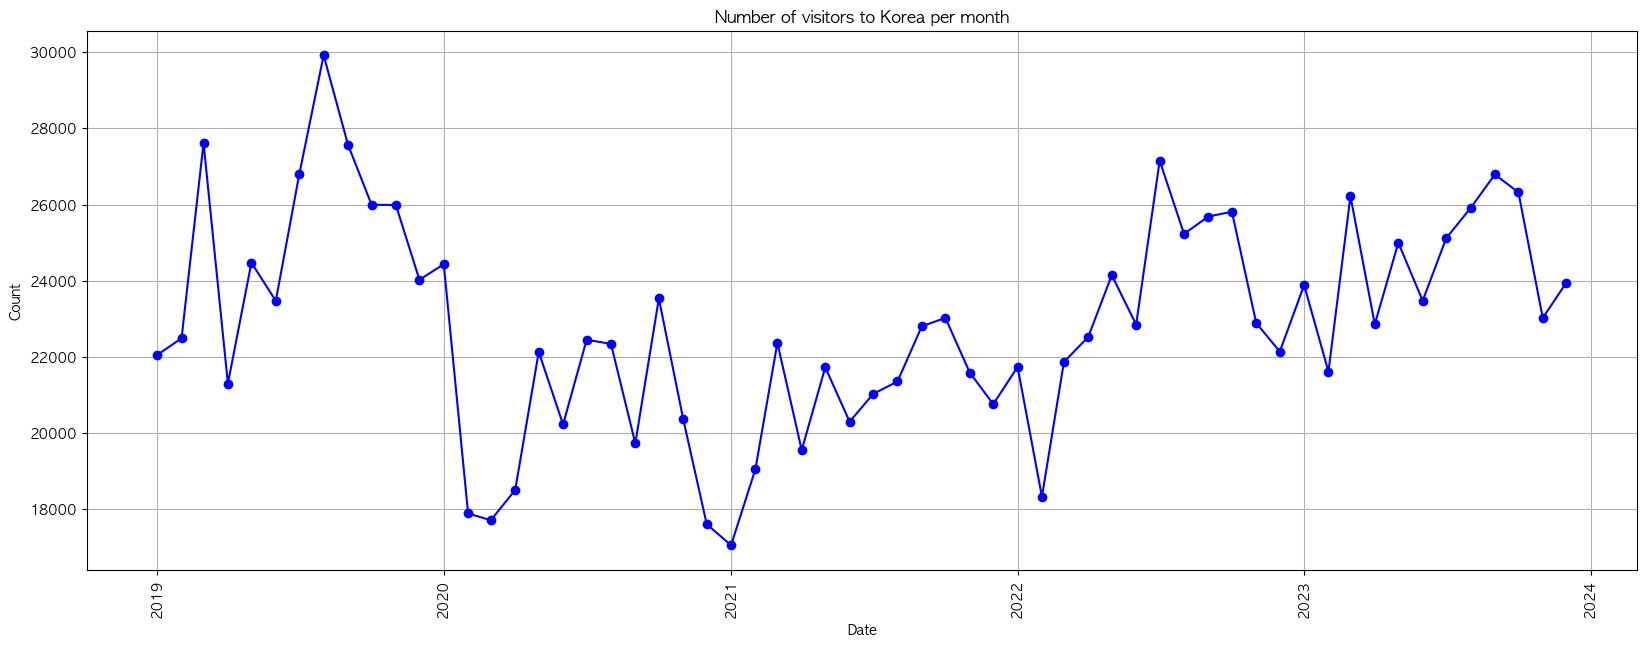

In [98]:
# 2020 ~ 2021년은 방문자수가 상대적으로 적다 -> 코로나 영향으로 예상
# 이렇게 특수한 경우로 인해 데이터가 달라지는 경우가 있을 수도 있다. ex) 산불, 범죄 등

plt.figure(figsize=(20, 7))
plt.plot(whole_df['기준연월'], whole_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Korea per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [99]:
# 기준연월을 기준으로 오름차순 정렬 -> 원래 그래프 그리기 전에 해야됨
whole_df = whole_df.sort_values('기준연월')

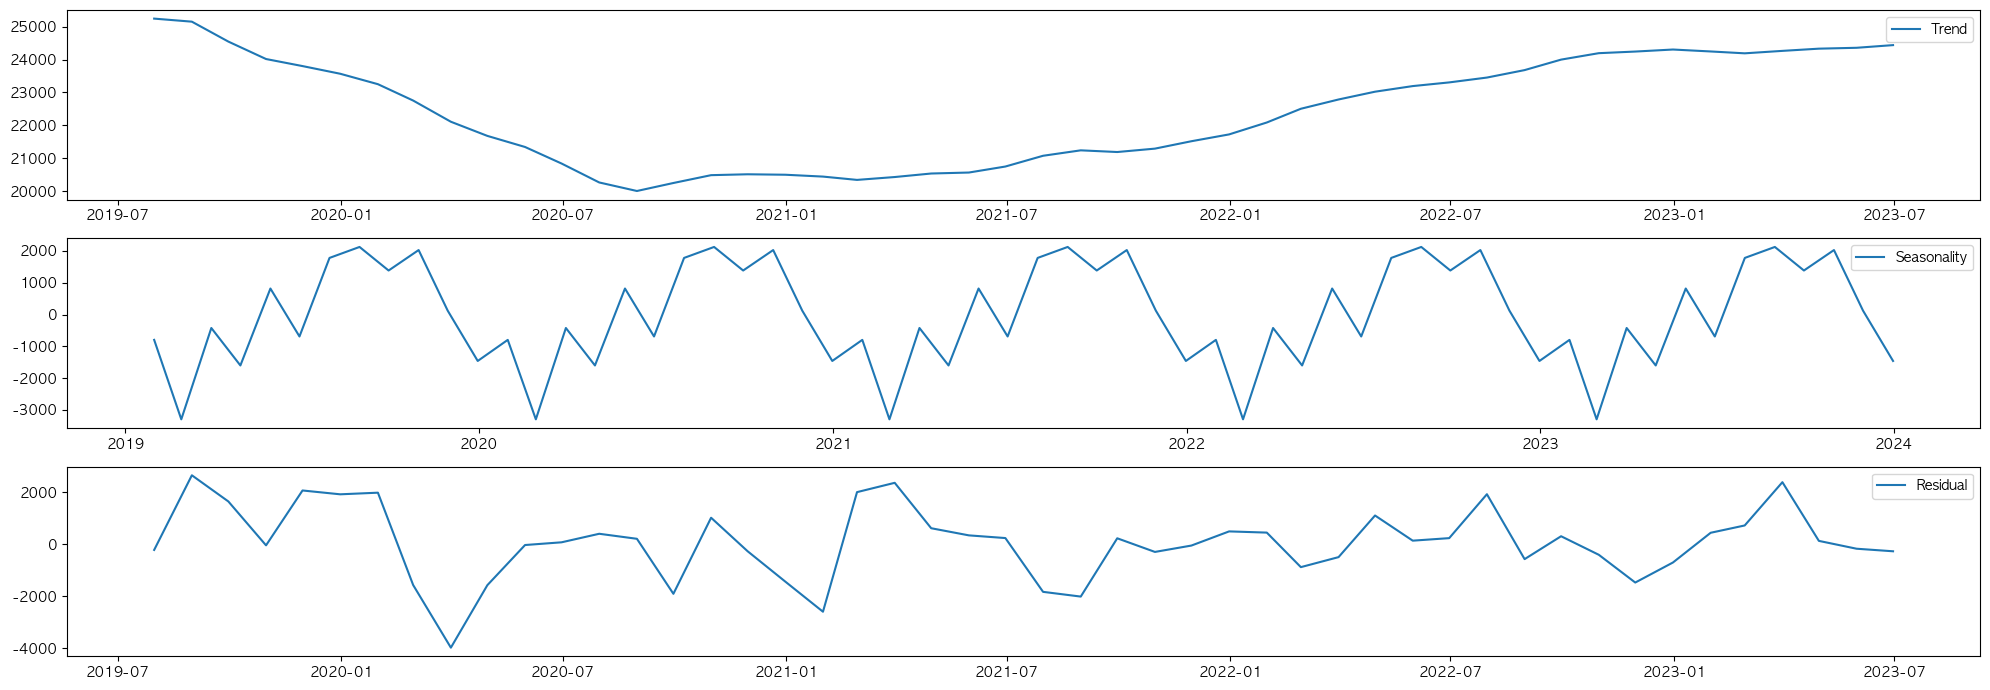

In [100]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = whole_df.set_index('기준연월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

### 서울 방문 횟수 시각화

In [101]:
seoul_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,50994190.0,48209017.0,5.8
1,2019-02-01,45689903.0,43244984.0,5.6
2,2019-03-01,62763858.0,56836343.0,10.4
3,2019-04-01,45611793.0,45564502.0,0.1
4,2019-05-01,53726633.0,49446437.0,8.6


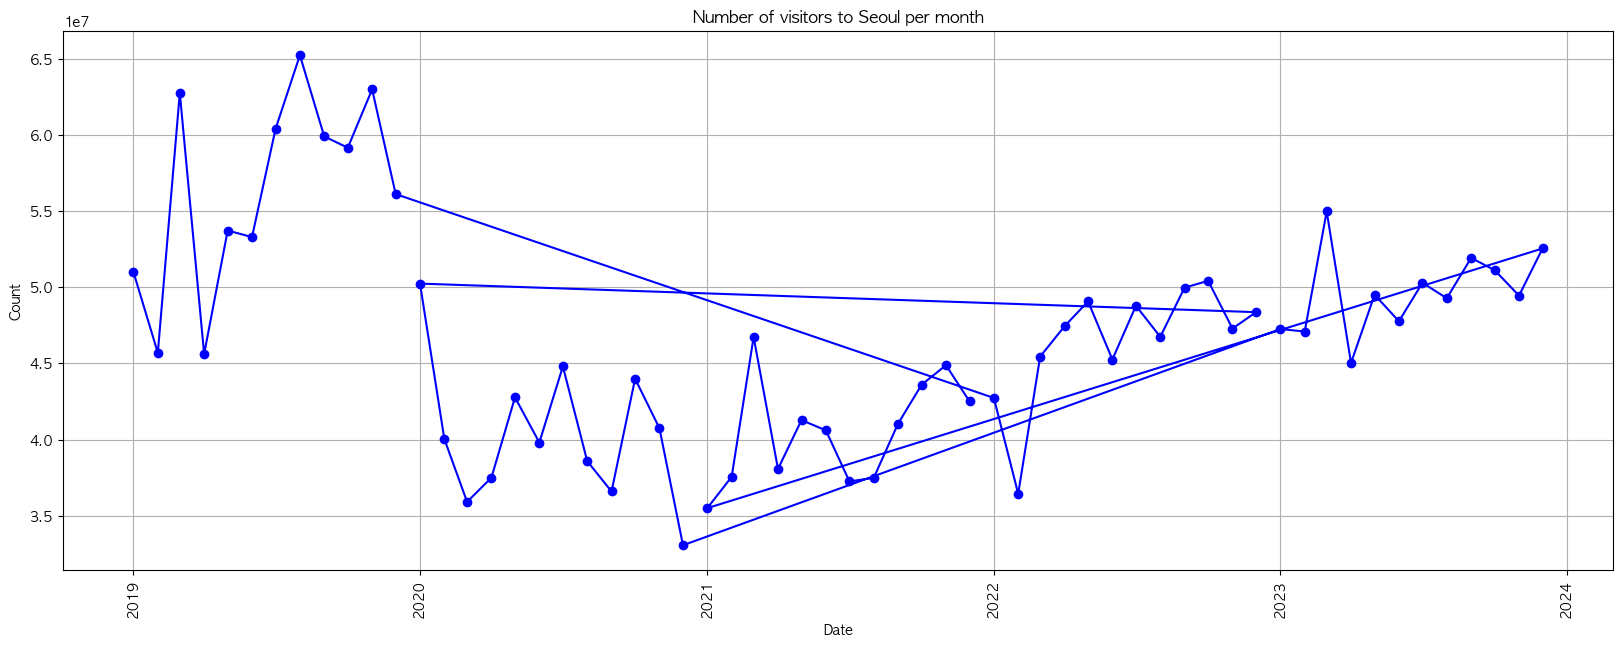

In [102]:
# 월별 서울 방문자 수 시각화

plt.figure(figsize=(20, 7))
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

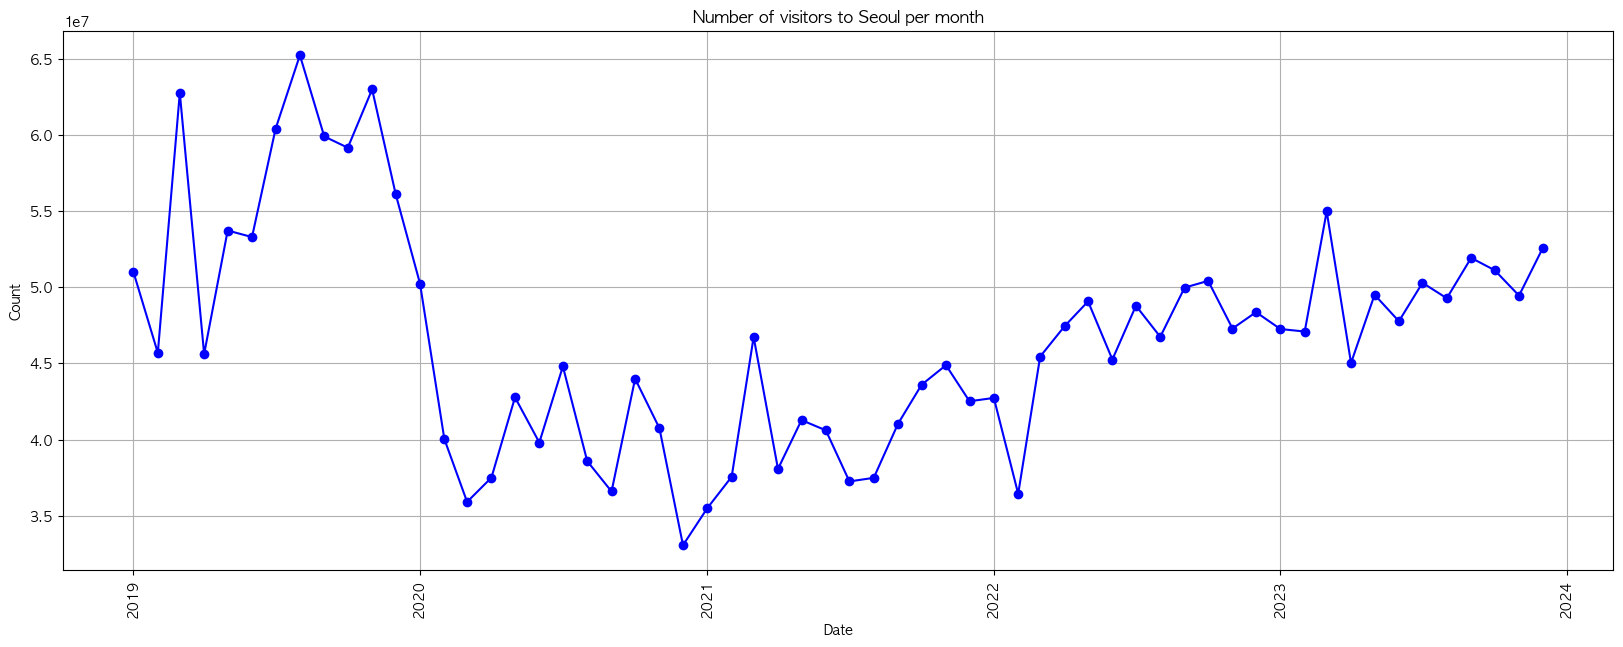

In [103]:
# 위 그래프를 보면 섞여있다. -> 기준년월을 기준으로 정렬
seoul_df = seoul_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

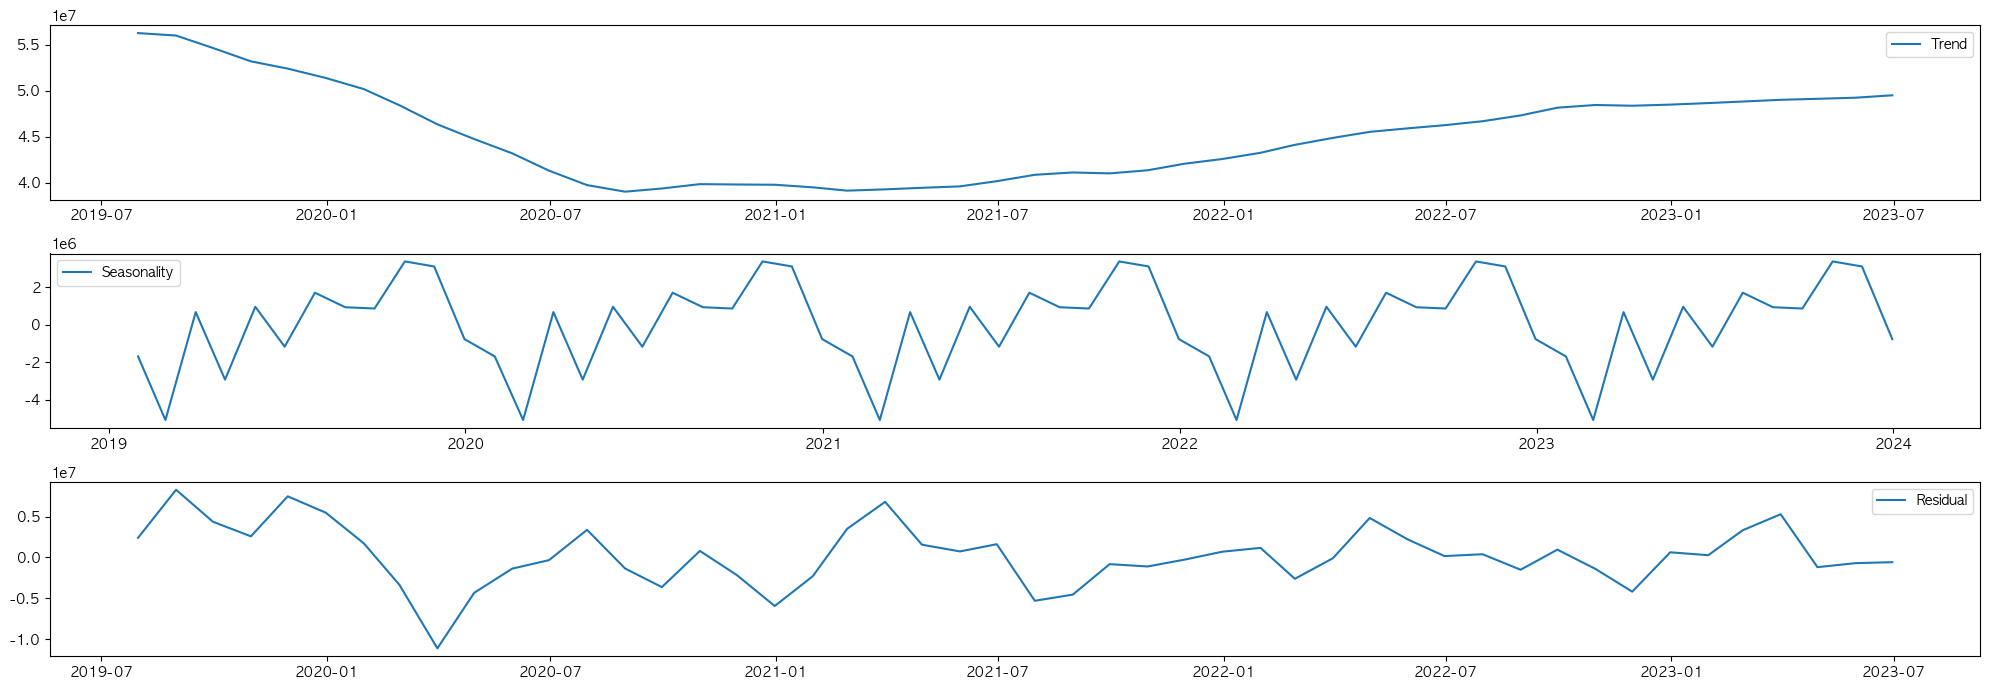

In [104]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = seoul_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

### 부산 방문 횟수 시각화

In [105]:
busan_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2023-01-01,13180063.0,11378474.0,15.8
1,2023-02-01,11238505.0,9885886.0,13.7
2,2023-03-01,13159913.0,11373916.0,15.7
3,2023-04-01,11489345.0,10080243.0,14.0
4,2023-05-01,12455221.0,11858544.0,5.0


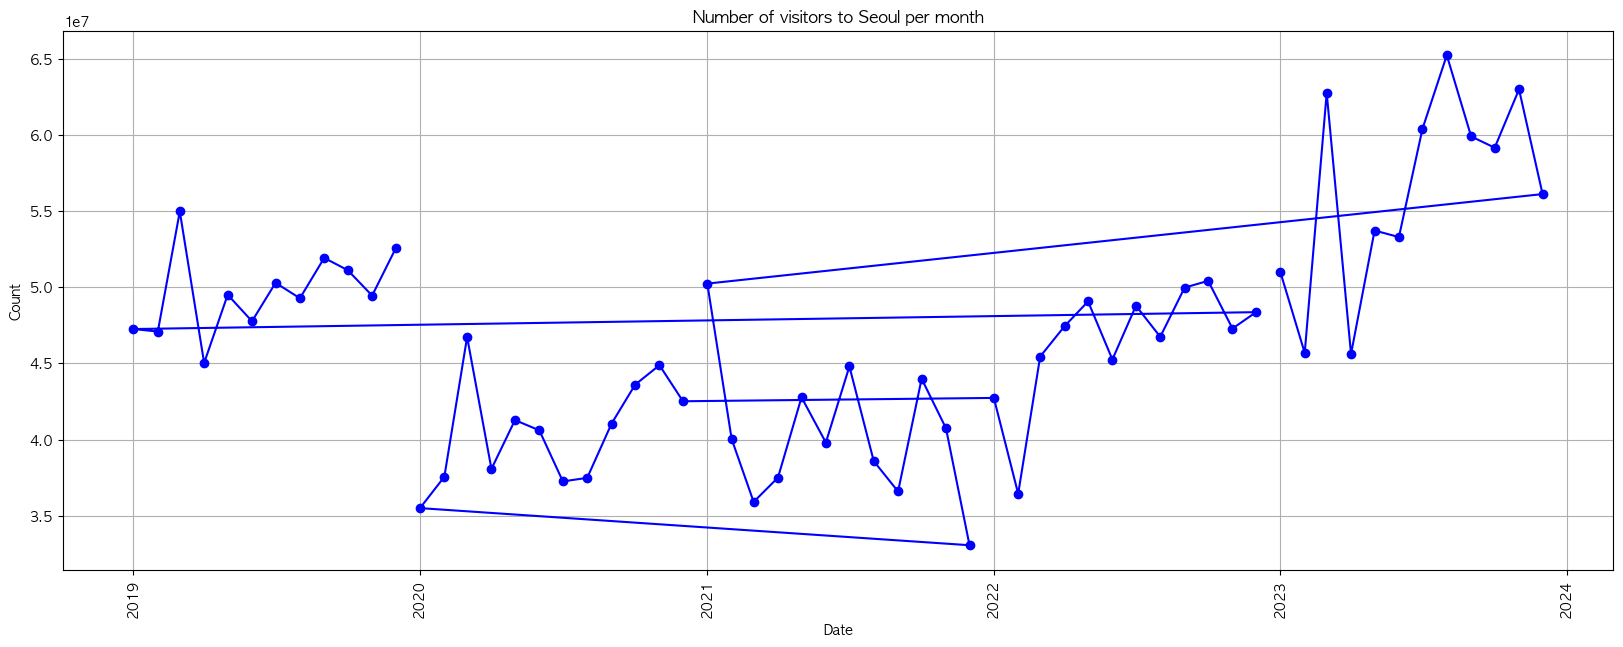

In [106]:
# 월별 서울 방문자 수 시각화

plt.figure(figsize=(20, 7))
plt.plot(busan_df['기준년월'], seoul_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

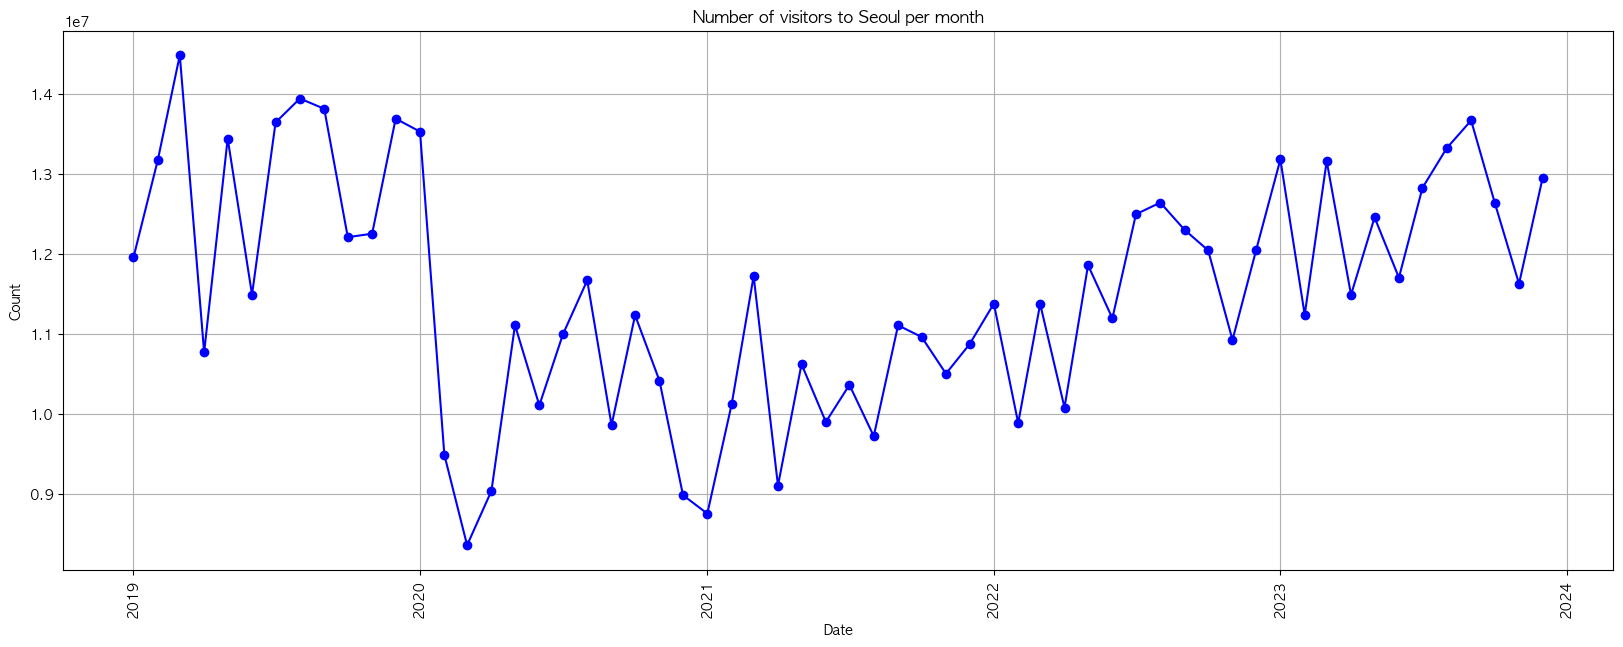

In [107]:
# 위 그래프를 보면 섞여있다. -> 기준년월을 기준으로 정렬
busan_df = busan_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(busan_df['기준년월'], busan_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

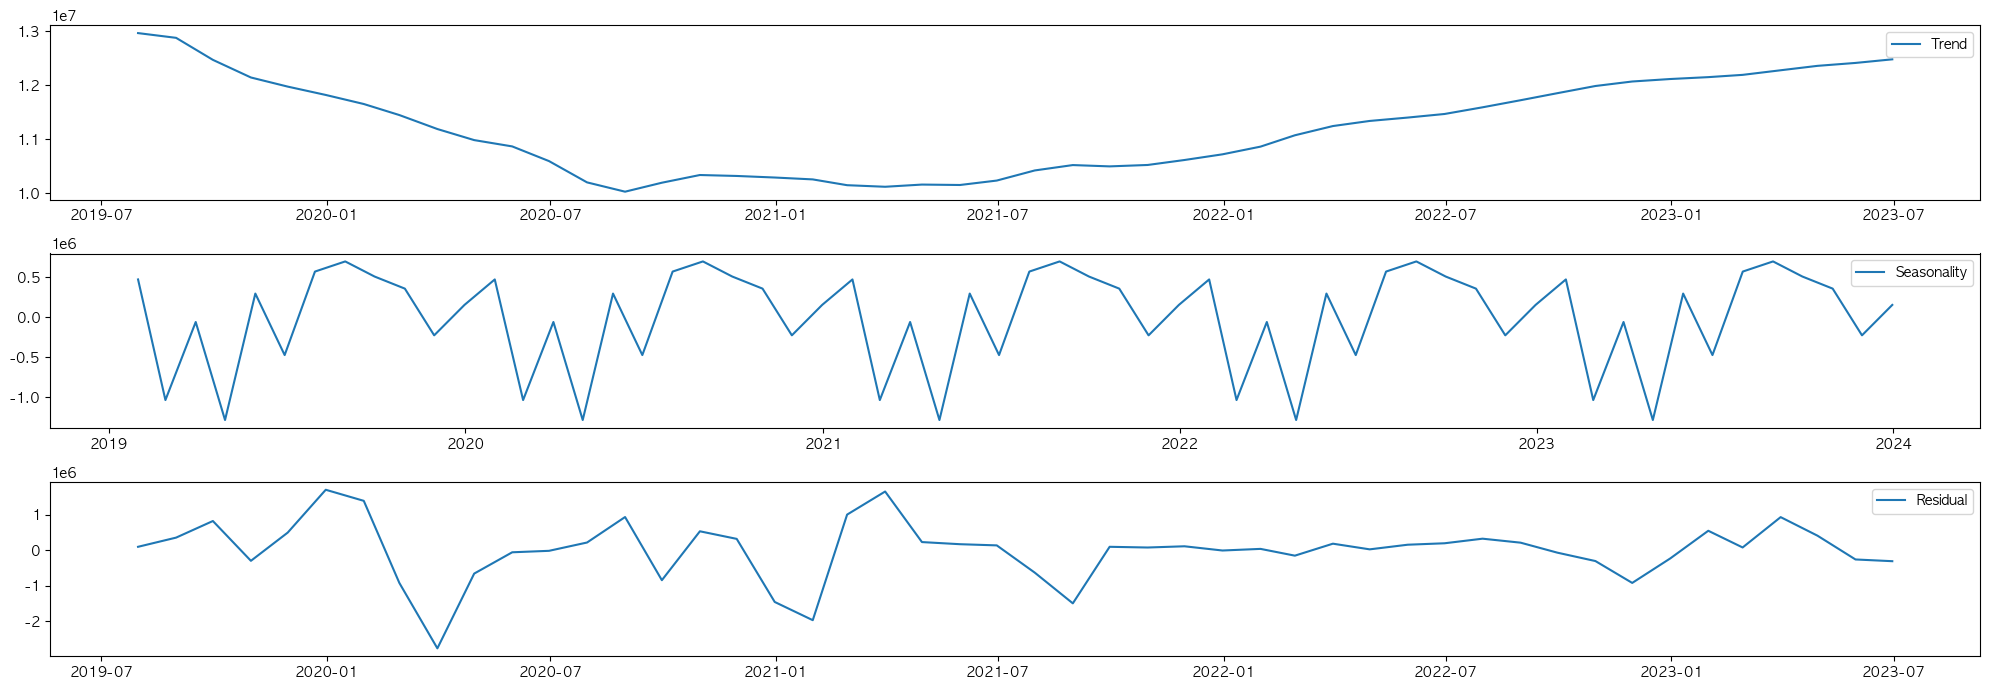

In [108]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = busan_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

### 대구 방문 횟수 시각화

In [109]:
daegu_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2022-01-01,7875914.0,6445317.0,22.2
1,2022-02-01,6501135.0,7144530.0,-9.0
2,2022-03-01,7582943.0,8142325.0,-6.9
3,2022-04-01,7046315.0,6834107.0,3.1
4,2022-05-01,7751185.0,7491790.0,3.5


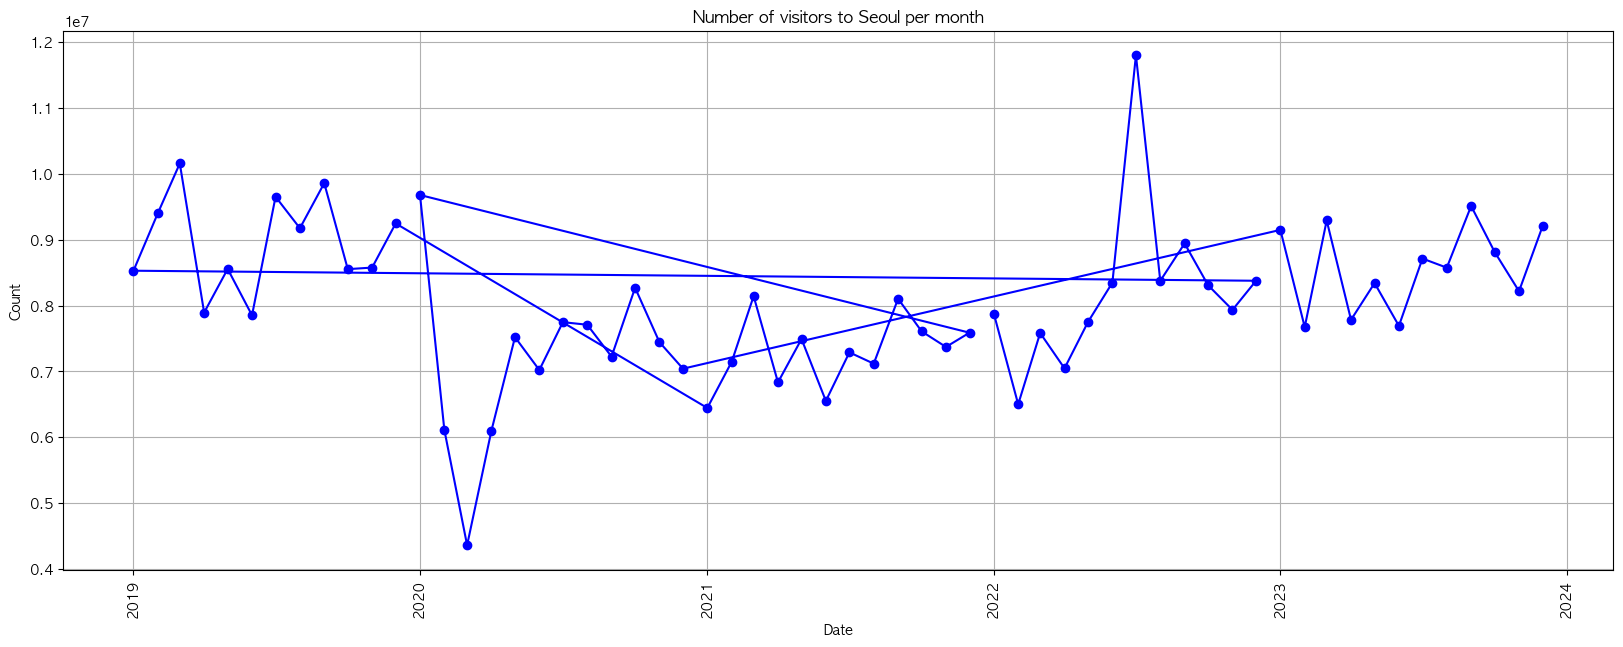

In [110]:
# 월별 서울 방문자 수 시각화

plt.figure(figsize=(20, 7))
plt.plot(daegu_df['기준년월'], daegu_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

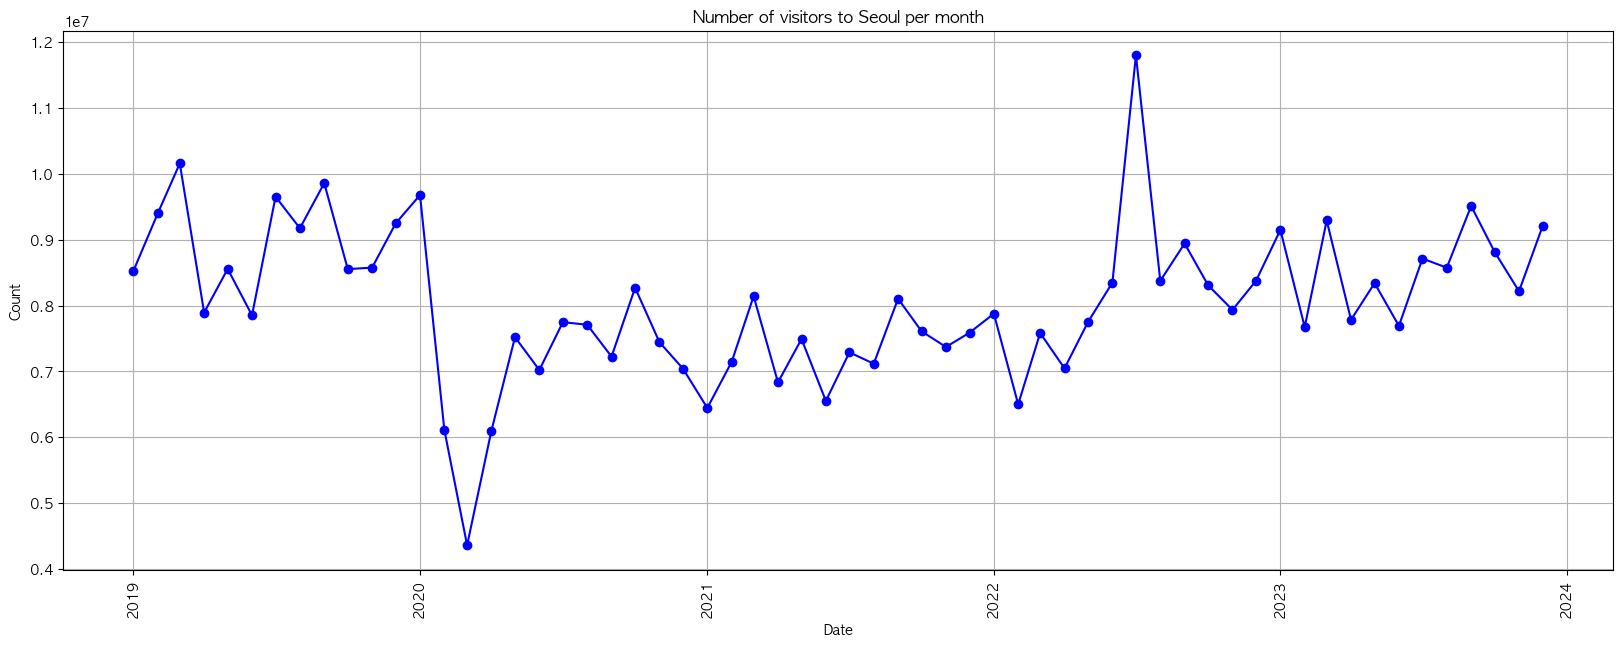

In [111]:
# 위 그래프를 보면 섞여있다. -> 기준년월을 기준으로 정렬
daegu_df = daegu_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(daegu_df['기준년월'], daegu_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

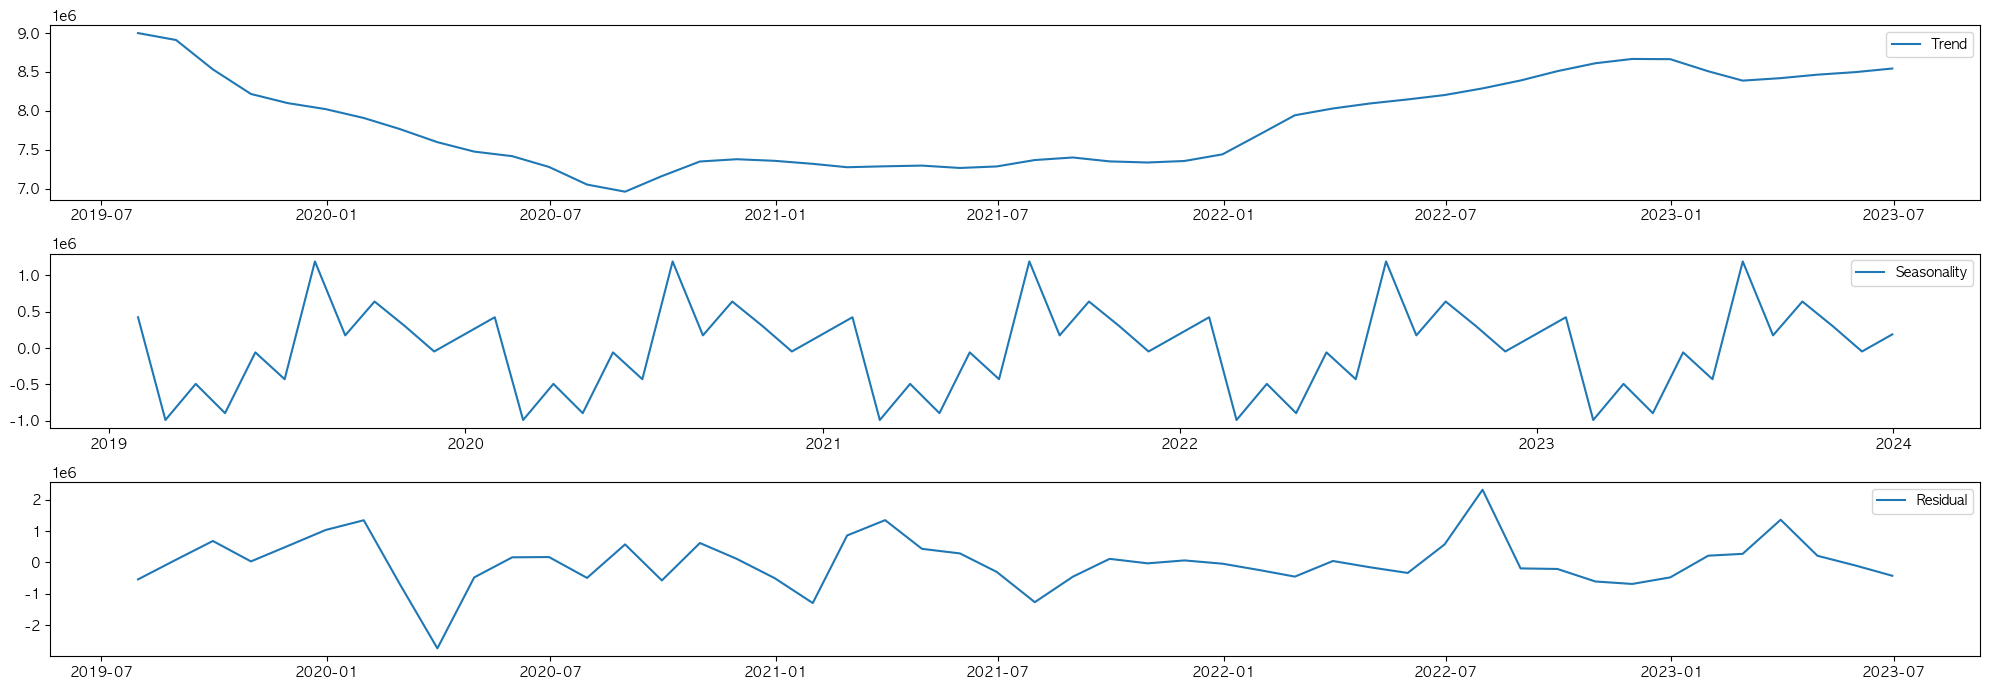

In [112]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = daegu_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

### 전국, 서울, 부산, 대구 방문자수 그래프 시각화

In [113]:
tmp = whole_df.columns.to_list()
tmp

['기준연월', '방문자수', '전년동기 방문자수', '방문자수 증감률', '관광지출액', '전년동기 관광지출액', '관광지출액 증감률']

In [114]:
tmp[0] = '기준년월'
tmp

['기준년월', '방문자수', '전년동기 방문자수', '방문자수 증감률', '관광지출액', '전년동기 관광지출액', '관광지출액 증감률']

In [115]:
whole_df.columns = tmp

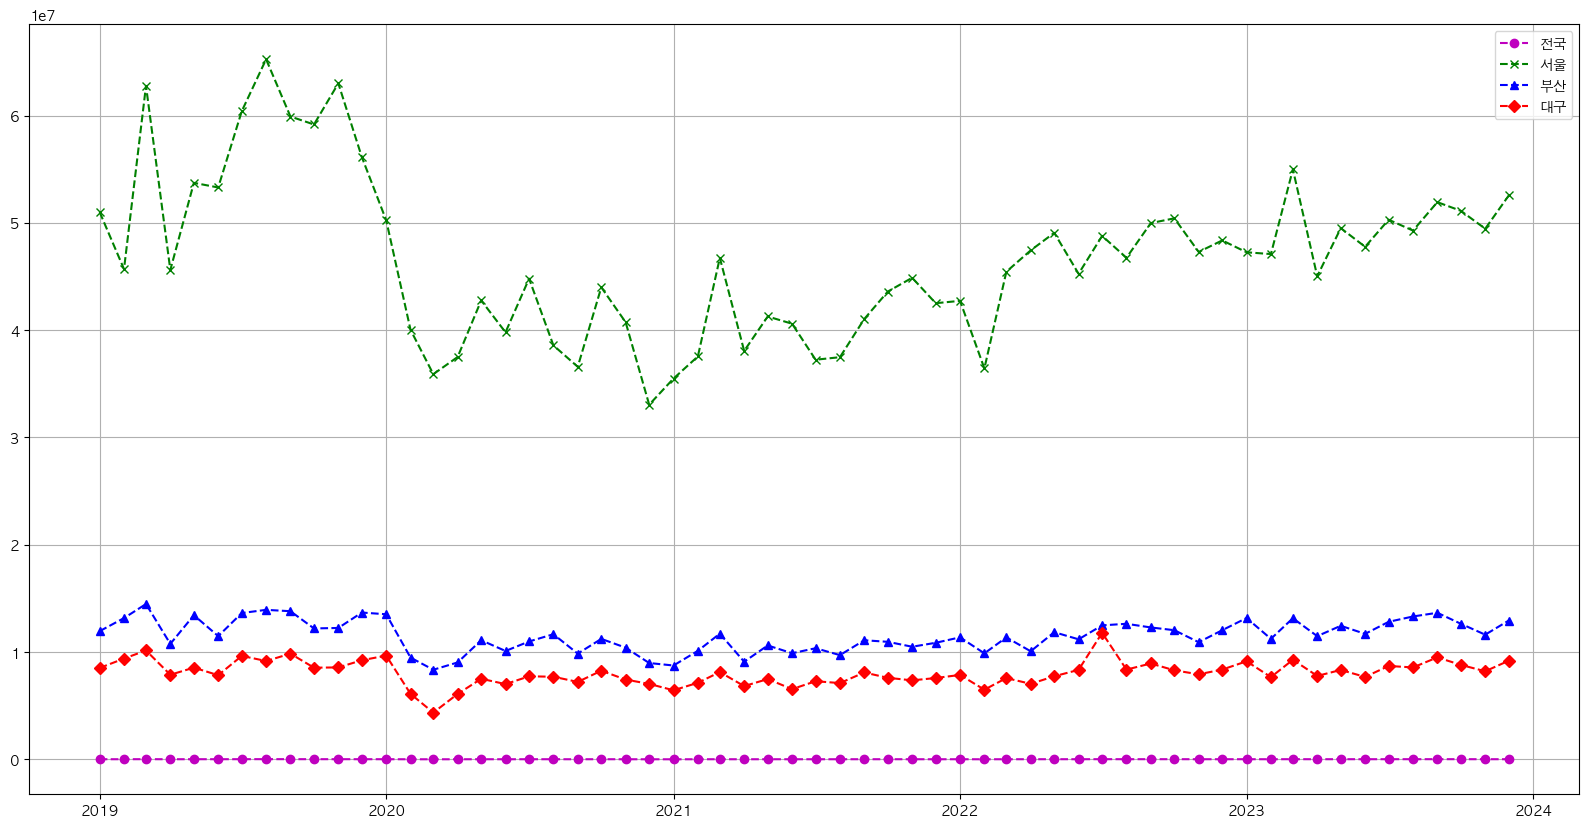

In [116]:
# 전국, 서울, 부산, 대구 방문자수 그래프 시각화
# 전국 데이터가 바닥에 붙어있다. -> 데이터를 확인하니 값이 매우 작게 되어있다. -> 단위의 차이인지 확인필요

# 서울의 경우 데이터 값이 압도적으로 커서 상대적으로 멀리 떨어져있다.
# 데이터 정규화가 필요할 것 같다.

# 전체적으로 형태가 비슷 -> 한 지역이 상승하면 다른 지역도 상승
# 부산과 대구의 경우 방문자가 거의 동일한 형태를 보인다.
# 2022년 중반에 갑자기 확 튀는 경우가 있는데 이유를 확인하고 관련 행사를 진행하거나 마케팅을 하면 좋을 것 같다.

plt.figure(figsize=(20, 10))
plt.plot(whole_df['기준년월'], whole_df['방문자수'], marker='o', linestyle='--', color='m', label='전국')
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='x', linestyle='--', color='g', label='서울')
plt.plot(busan_df['기준년월'], busan_df['방문자수'], marker='^', linestyle='--', color='b', label='부산')
plt.plot(daegu_df['기준년월'], daegu_df['방문자수'], marker='D', linestyle='--', color='r', label='대구')
plt.legend()
plt.grid(True)
plt.show()

### 전국 방문자수 증감률, 지출액 그래프 시각화

In [117]:
whole_df.head()

,기준년월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,2019-01-01,22053.0,20920.0,5.4,3243.0,3143.0,3.2
1,2019-02-01,22490.0,20802.0,8.1,3037.0,2975.0,2.1
2,2019-03-01,27615.0,24846.0,11.1,3510.0,3450.0,1.8
3,2019-04-01,21300.0,21156.0,0.7,3295.0,3389.0,-2.8
4,2019-05-01,24476.0,23903.0,2.4,3621.0,3610.0,0.3


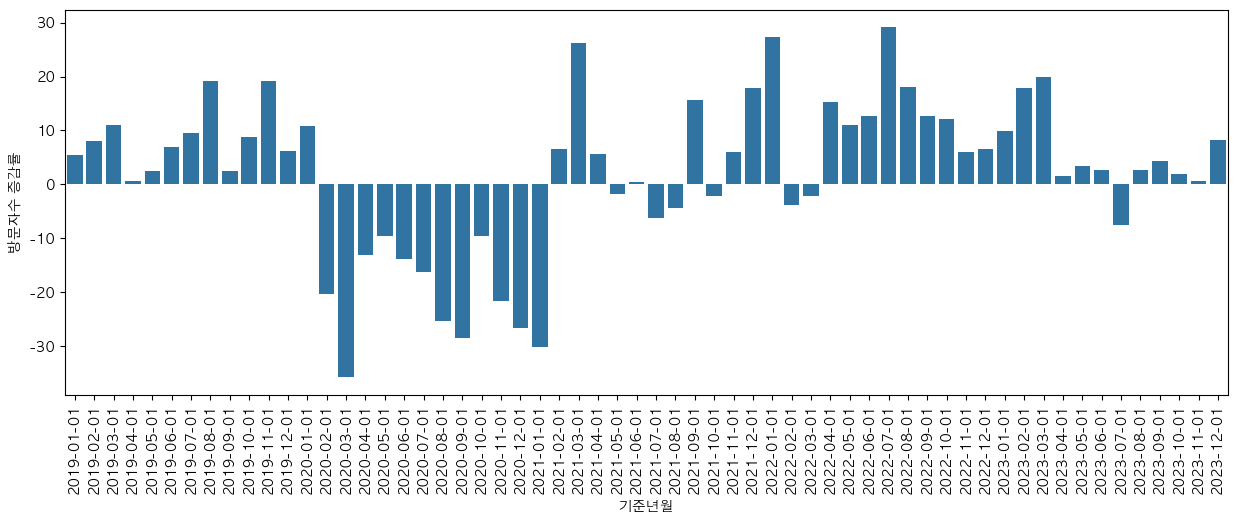

In [118]:
# 2020년에는 대부분이 감소했다. -> 코로나 영향으로 예상

plt.figure(figsize=(15,5))
sns.barplot(data=whole_df, x='기준년월', y='방문자수 증감률')
plt.xticks(rotation=90)
plt.show()

In [119]:
# 월 데이터를 따로 추출해서 col을 만든다.
whole_df['month'] = whole_df['기준년월'].dt.month
whole_df.head(12)

,기준년월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률,month
0,2019-01-01,22053.0,20920.0,5.4,3243.0,3143.0,3.2,1
1,2019-02-01,22490.0,20802.0,8.1,3037.0,2975.0,2.1,2
2,2019-03-01,27615.0,24846.0,11.1,3510.0,3450.0,1.8,3
3,2019-04-01,21300.0,21156.0,0.7,3295.0,3389.0,-2.8,4
4,2019-05-01,24476.0,23903.0,2.4,3621.0,3610.0,0.3,5
5,2019-06-01,23472.0,21938.0,7.0,3419.0,3415.0,0.1,6
6,2019-07-01,26799.0,24455.0,9.6,3366.0,3516.0,-4.2,7
7,2019-08-01,29920.0,25096.0,19.2,3559.0,3514.0,1.3,8
8,2019-09-01,27570.0,26935.0,2.4,3236.0,3511.0,-7.8,9
9,2019-10-01,25997.0,23898.0,8.8,3484.0,3531.0,-1.3,10


In [120]:
# month를 기준으로 groupby를 해서 월별 관광지출액을 구한다.

tmp = whole_df.groupby('month')['관광지출액'].agg(['sum', 'mean'])
tmp

,sum,mean
month,,
1,14402.0,2880.4
2,13203.0,2640.6
3,14748.0,2949.6
4,15654.0,3130.8
5,17414.0,3482.8
6,16272.0,3254.4
7,16270.0,3254.0
8,16184.0,3236.8
9,15400.0,3080.0


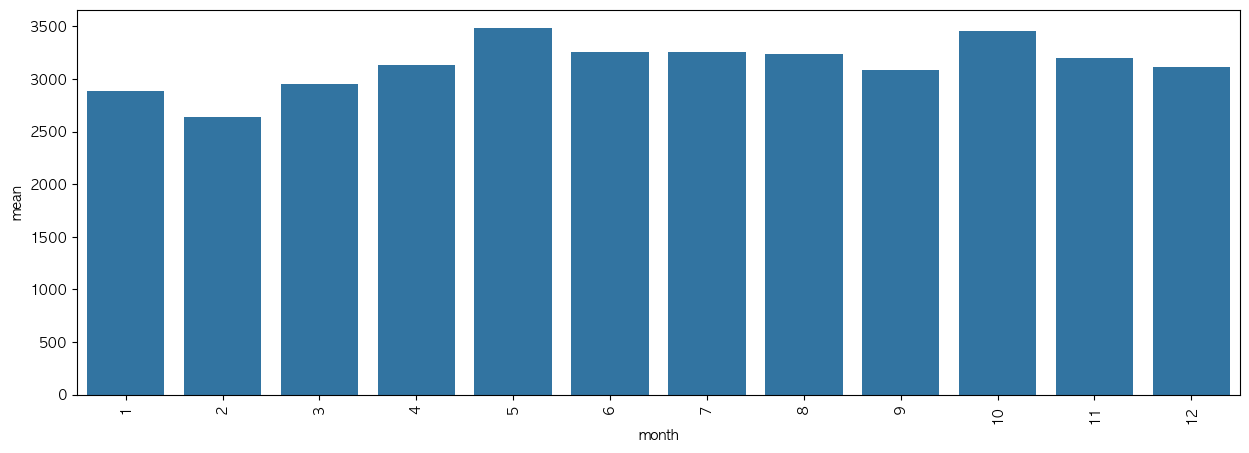

In [121]:
# 월별 관광지출액의 평균 시각화
# 평균에서는 크게 차이가 없다. -> 성수기, 비수기 인당 쓰는 비용에는 크게 차이가 없는 것 같다.

plt.figure(figsize=(15,5))
sns.barplot(data=tmp, x='month', y='mean')
plt.xticks(rotation=90)
plt.show()

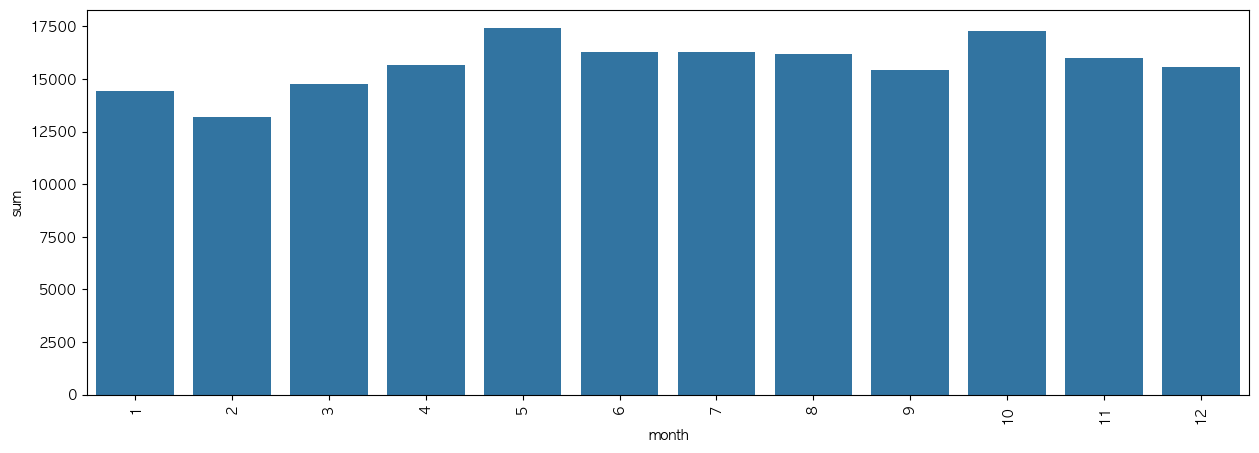

In [122]:
# 월별 관광지출액의 누적 합계
# 월별 관광지출액에 크게 차이가 없다..?

# 흠... 뭔가 데이터에 대한 이해가 부족해서 해석이 잘못된 것일 수도 있다.
plt.figure(figsize=(15,5))
sns.barplot(data=tmp, x='month', y='sum')
plt.xticks(rotation=90)
plt.show()

### 서울 방문자수 증감률 그래프 시각화

In [123]:
seoul_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,50994190.0,48209017.0,5.8
1,2019-02-01,45689903.0,43244984.0,5.6
2,2019-03-01,62763858.0,56836343.0,10.4
3,2019-04-01,45611793.0,45564502.0,0.1
4,2019-05-01,53726633.0,49446437.0,8.6


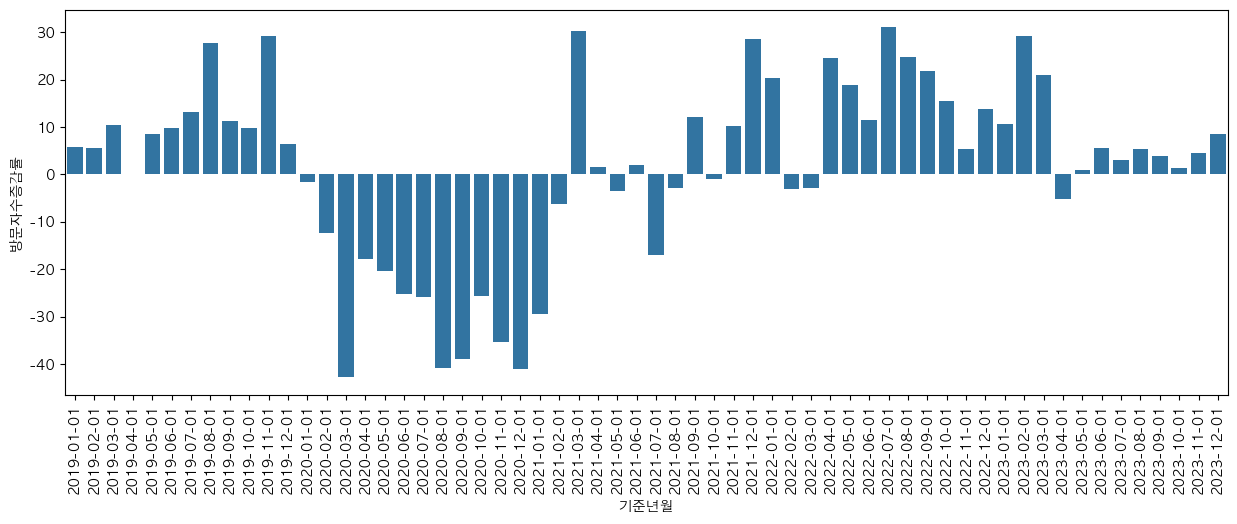

In [124]:
plt.figure(figsize=(15,5))
sns.barplot(data=seoul_df, x='기준년월', y='방문자수증감률')
plt.xticks(rotation=90)
plt.show()

### 부산 방문자수 증감률 그래프 시각화

In [125]:
busan_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
48,2019-01-01,11955728.0,11994748.0,-0.3
49,2019-02-01,13173160.0,12522119.0,5.2
50,2019-03-01,14482347.0,13481242.0,7.4
51,2019-04-01,10768786.0,10865458.0,-0.9
52,2019-05-01,13441241.0,12491155.0,7.6


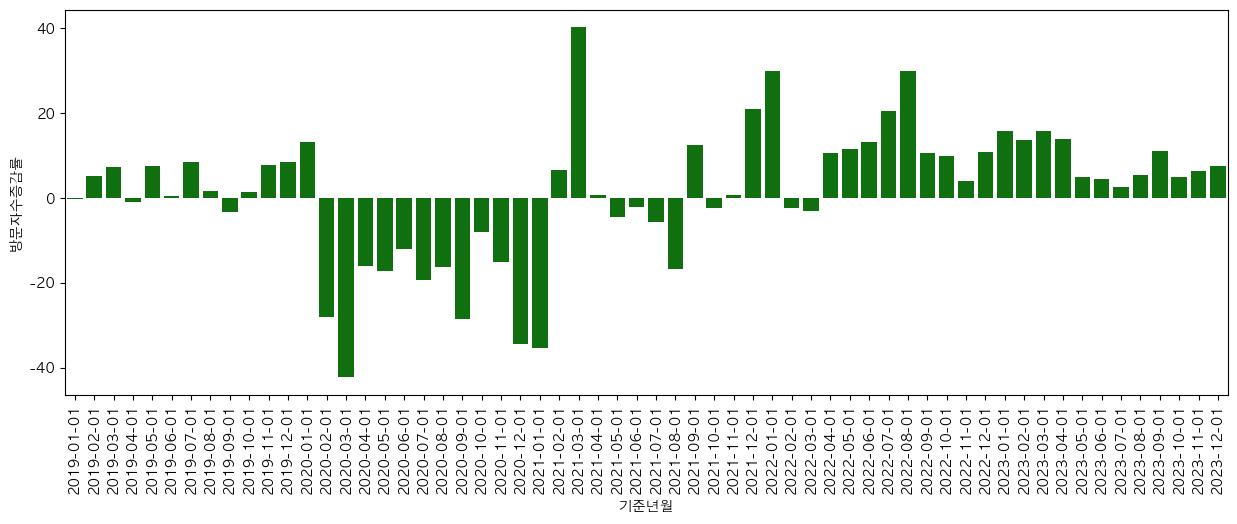

In [126]:
plt.figure(figsize=(15,5))
sns.barplot(data=busan_df, x='기준년월', y='방문자수증감률', color='g')
plt.xticks(rotation=90)
plt.show()

### 대구 방문자수 증감률 그래프 시각화

In [127]:
daegu_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
12,2019-01-01,8527814.0,8446098.0,1.0
13,2019-02-01,9399775.0,8851573.0,6.2
14,2019-03-01,10155206.0,9481876.0,7.1
15,2019-04-01,7892780.0,7891776.0,0.0
16,2019-05-01,8554829.0,8989406.0,-4.8


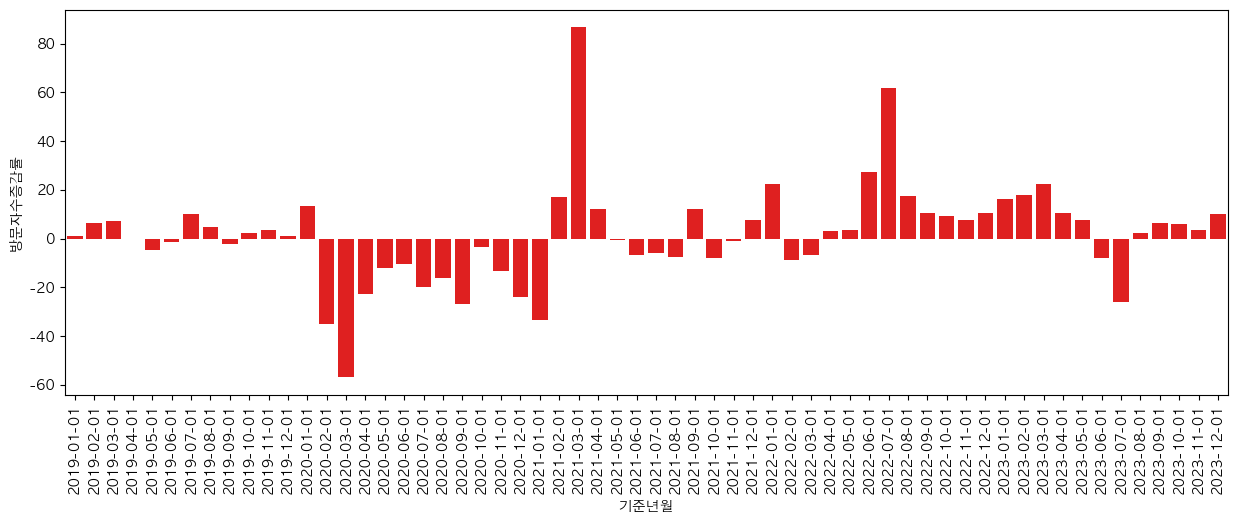

In [128]:
plt.figure(figsize=(15,5))
sns.barplot(data=daegu_df, x='기준년월', y='방문자수증감률', color='r')
plt.xticks(rotation=90)
plt.show()

### 크롤링한 데이터 분류

In [129]:
import os
import shutil

data_path = './data/한국관광 데이터랩/분류전'
sort_path = './data/한국관광 데이터랩/분류'

In [130]:
data_dir_list = os.listdir(data_path)
data_dir_list

['.DS_Store', '20240430234117_부산광역시_202001-202012_데이터랩_다운로드.zip']

In [131]:
data_dir_list.pop(5)
data_dir_list

IndexError: pop index out of range

In [132]:
for data_dir in data_dir_list:
    key = data_dir.split('-')[0].split('_')[1]
    shutil.move(os.path.join(data_path, data_dir), os.path.join(sort_path, key))